# **ML1 Final Project: Employee Attrition Model**

---------------

### **Use Case**

Employee attrition is costly for organizations due to expenses related to hiring, onboarding, and training new employees, as well as lost productivity and institutional knowledge. If we could predict attrition risk for employees and take proactive measures, organizations could retain key talent and reduce hiring costs, ultimately improving business performance.


### **Model Objective**

To address this use case, I will build a supervised learning predictive model that identifies employee attrition risk levels based on data available in employee records.

### **Github Repo**
https://github.com/zookie231/UCML1


### **Data Description**

Although I would like to use real data from my employer to build this model, due to the sensitivity of that information I will instead be using a public data set from Kaggle.  This will give me a framework that I can then apply to real data from my employer within the appropriate company systems.

The dataset used for this model is from Kaggle and can be found at:
https://www.kaggle.com/datasets/singhnproud77/hr-attrition-dataset

The data includes a feature on whether the employee left the organization (attrition) and many other employee variables described below.

Data description:
The data has 32 columns:
- Attrition: this is what we are are trying to predict and will be our target variable for model building.  Values of Yes or No.  Note: I added a column to the csv that tranformed this to a "1" (Yes) or "0" (No) and labeled the column as Attrition_Label
- Age: employee age
- BusinessTravel: 3 categories that indicate level of business travel for the employee
- Department: which department the employee works in
- DistanceFromHome: how far does the employee reside from the work location
- Gender: limited to binary male or female
- JobInvolvement: level of involvement from 1 Low to 4 Very High
- JobLevel: based on employee rank within organization from 1 Low to 5 Very High
- JobRole: job category/title for the employee (such as Sales Rep, Research Technician, etc.)
- JobSatisfaction: from 1 Low to 4 Very High
- MaritalStatus: marital status of the employee
- MonthlyIncome: income of the employee
- NumCompaniesWorked: how many companies has the employee worked for
- OverTime: Yes or No on whether the employee works overtime
- PercentageSalaryHike: what was the last raise % for the employee
- PerformanceRating: from 1 Low to 4 Outstanding
- StockOptionLevel: numerical flag to indicate Stock Option status for each employee, ranging from 0 to 4
- TotalWorkingYears: total years of working for each employee
- TrainingTimesLastYear: number of training initiatives the employee participated in last year
- YearsAtCompany: how many years with this company
- YearsSinceLastPromotion: how many years since the employee was last promoted
- YearsWithCurrManager: how many years has the employee been with their current manager
- Higher_Education: level of education
- Date_of_Hire: hire date of the employee
- Date_of_Termination: column is empty
- Status_of_Leaving: description of why employee could leave company
- Mode_of_Work: whether employee works from home or in office
- Leaves: permitted leaves taken by the employee
- Absenteeism: number of absences for the employee
- Work_accident: whether the employee has had a work accident (yes or no)
- Source_of_Hire: how the employee was initially recruited to the company
- Job_mode: whether the employee is full time, part time, or contractor

Attrition Label column:
Note: within the csv file, I added a 33rd column called Attrition_Label that converted Attrition of Yes to 1 and Attrition of No to 0.  

With the addition of the Attrition_Label column, I now have 33 columns.  Data file can be found at:
https://github.com/zookie231/UCML1


### **Analysis & Modeling Process**
We are trying to predict attrition risk.  As such Attrition_Label with values of 1 for Attrition and 0 for No Attrition will be used as my target variable.

We will load the dataset, conduct EDA, explore various supervised learning approaches, then determine a path forward for either model deployment or further model refinement.



-----------
##  **Importing the libraries required**
-----------

In [961]:
# Importing the basic libraries we will require for the project


import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

import warnings;
import numpy as np
warnings.filterwarnings('ignore')


-----------
##  **Loading the dataset**
-----------

In [962]:
# Loading the dataset from GitHub
github_url = "https://raw.githubusercontent.com/zookie231/UCML1/main/ml1final.csv"
data = pd.read_csv(github_url)

---------
## **Exploratory Data Analysis & Data Transformation**
----------

#### List of Columns ####

Let's see the names of all columns in the dataset

In [963]:
columns_list = data.columns.tolist()
print(columns_list)

['Attrition_Label', 'Attrition', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education', 'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving', 'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident', 'Source_of_Hire', 'Job_mode']


**First 5 Rows**

To get a general understanding of the data structure, let's take a look at the first 5 rows

In [964]:
data.head()

Attrition_Label Attrition  Age BusinessTravel              Department  \
0                1       Yes   37  Travel_Rarely  Research & Development   
1                0        No   21  Travel_Rarely  Research & Development   
2                0        No   45  Travel_Rarely  Research & Development   
3                0        No   23  Travel_Rarely                   Sales   
4                0        No   22  Travel_Rarely  Research & Development   

   DistanceFromHome  Gender  JobInvolvement  JobLevel                JobRole  \
0                 2    Male               2         1  Laboratory Technician   
1                15    Male               3         1     Research Scientist   
2                 6    Male               3         3      Research Director   
3                 2    Male               3         1   Sales Representative   
4                15  Female               3         1  Laboratory Technician   

   ...  Higher_Education Date_of_Hire  Date_of_termination  \
0  ...        Graduation   21-01-2021                  NaN   
1  ...        Graduation   13-03-2021                  NaN   
2  ...   Post-Graduation   23-01-2021                  NaN   
3  ...               PHD   25-04-2021                  NaN   
4  ...               PHD   14-06-2021                  NaN   

    Status_of_leaving Mode_of_work  Leaves  Absenteeism  Work_accident  \
0              Salary       OFFICE       4            2             No   
1       Work Accident          WFH       5            2             No   
2           Dept.Head          WFH       1            3             No   
3       Work Accident       OFFICE       1            0            Yes   
4  Better Opportunity          WFH       5            2             No   

   Source_of_Hire   Job_mode  
0       Job Event   Contract  
1       Recruiter  Part Time  
2       Job Event   Contract  
3       Recruiter   FullTime  
4       Job Event   Contract  

[5 rows x 33 columns]

**Bottom 5 Rows**

Let's also take a look at the bottom 5 rows

In [965]:
data.tail()

Attrition_Label Attrition  Age BusinessTravel              Department  \
1465                0        No   52  Travel_Rarely                   Sales   
1466                0        No   55  Travel_Rarely  Research & Development   
1467                0        No   55  Travel_Rarely                   Sales   
1468                0        No   58  Travel_Rarely                   Sales   
1469                1       Yes   58  Travel_Rarely  Research & Development   

      DistanceFromHome  Gender  JobInvolvement  JobLevel  \
1465                 3    Male               2         4   
1466                 1    Male               3         5   
1467                26    Male               2         5   
1468                10    Male               3         4   
1469                23  Female               3         3   

                        JobRole  ...  Higher_Education Date_of_Hire  \
1465                    Manager  ...   Post-Graduation     5/6/1987   
1466                    Manager  ...   Post-Graduation   20-01-1985   
1467                    Manager  ...   Post-Graduation   17-02-1985   
1468            Sales Executive  ...               PHD   29-06-1984   
1469  Healthcare Representative  ...              12th     8/2/1981   

      Date_of_termination  Status_of_leaving Mode_of_work  Leaves  \
1465                  NaN             Salary       OFFICE       3   
1466                  NaN      Work Accident          WFH       1   
1467                  NaN      Work Accident       OFFICE       2   
1468                  NaN   Work Environment          WFH       2   
1469                  NaN   Work Environment          WFH       4   

      Absenteeism  Work_accident  Source_of_Hire   Job_mode  
1465            2             No      Job Portal  Part Time  
1466            1             No         Walk-in   FullTime  
1467            1             No       Recruiter  Part Time  
1468            2            Yes       Job Event  Part Time  
1469            3            Yes      Job Portal   FullTime  

[5 rows x 33 columns]

**Rows & Columns Count**

Let's get a count of the rows and columns

In [966]:
data.shape

(1470, 33)

I see there are 1470 rows and 33 columns in my data

**Field Types & Non-Null Counts**

Let's see the data type for each column and do a count of non-nulls.  This will help us understand any further data cleansing that needs to take place

In [967]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition_Label          1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   Age                      1470 non-null   int64  
 3   BusinessTravel           1470 non-null   object 
 4   Department               1470 non-null   object 
 5   DistanceFromHome         1470 non-null   int64  
 6   Gender                   1470 non-null   object 
 7   JobInvolvement           1470 non-null   int64  
 8   JobLevel                 1470 non-null   int64  
 9   JobRole                  1470 non-null   object 
 10  JobSatisfaction          1470 non-null   int64  
 11  MaritalStatus            1470 non-null   object 
 12  MonthlyIncome            1470 non-null   int64  
 13  NumCompaniesWorked       1470 non-null   int64  
 14  OverTime                

I see a mix of integer, float, and object types

I see one column has 0 non-null values (Date_of_termination).  We'll need to decide how to handle this column as we move forward.

**% Missing Values by Field**

For another view of missing values by field, we'll take a look at % of missing values in each column.  Althugh a bit redundant with previous step, putting it in % terms can help with understanding scale of missing values

In [968]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

% of Missing Values
Date_of_termination                    100.0
Attrition_Label                          0.0
StockOptionLevel                         0.0
Source_of_Hire                           0.0
Work_accident                            0.0
Absenteeism                              0.0
Leaves                                   0.0
Mode_of_work                             0.0
Status_of_leaving                        0.0
Date_of_Hire                             0.0
Higher_Education                         0.0
YearsWithCurrManager                     0.0
YearsSinceLastPromotion                  0.0
YearsAtCompany                           0.0
TrainingTimesLastYear                    0.0
TotalWorkingYears                        0.0
PerformanceRating                        0.0
Attrition                                0.0
PercentSalaryHike                        0.0
OverTime                                 0.0
NumCompaniesWorked                       0.0
MonthlyIncome                            0.0
MaritalStatus                            0.0
JobSatisfaction                          0.0
JobRole                                  0.0
JobLevel                                 0.0
JobInvolvement                           0.0
Gender                                   0.0
DistanceFromHome                         0.0
Department                               0.0
BusinessTravel                           0.0
Age                                      0.0
Job_mode                                 0.0

I see the only column with any missing values is Date_of_termination.  Without a need to impute this, we will remove this column later.

**Unique Values by Field**

Let's see how many different unique values are in each column

In [969]:
data.nunique()

Attrition_Label               2
Attrition                     2
Age                          43
BusinessTravel                3
Department                    3
DistanceFromHome             29
Gender                        2
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
Higher_Education              4
Date_of_Hire               1112
Date_of_termination           0
Status_of_leaving             5
Mode_of_work                  2
Leaves                        6
Absenteeism                   4
Work_accident                 2
Source_o

**Drop Unnecessary Columns**

In this step, we will drop columns that we will not use for modeling purposes

We will delete the following:
- Date_of_termination: this was all null values, so we will drop it
- Attrition: we have instead chosen the 1, 0 Attrition_Label column to use as our target variable, so this "Yes" or "No" column is redundant
- Status_of_leaving: this is only concretely known after the employee leaves the company.  We would not know this information when trying to predict attrition risk for current employees, so this column should be removed
- Date_of_hire: since we'll be running this model at different intervals of time with new dates added as we move forward, we don't want to train the model using specific dates of hire.  Instead we'll rely on a variable like YearsAtCompany.


I have also decided to remove the following:
- Gender
- Age
- MaritalStatus

These are all sensitive personal demographics. I would not want these variables to influence what types of programs I'd implement at my employer to help proactively address attrition risk.  Therefore, we will remove them from the model.

In [970]:
data.drop(columns=['Date_of_termination', 'Attrition', 'Status_of_leaving', 'Gender', 'Age', 'MaritalStatus','Date_of_Hire'], 
          inplace=True,
          errors='ignore')  

**Validate Columns were Dropped**

Let's confirm the columns were actually dropped

In [971]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Attrition_Label          1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   JobInvolvement           1470 non-null   int64 
 5   JobLevel                 1470 non-null   int64 
 6   JobRole                  1470 non-null   object
 7   JobSatisfaction          1470 non-null   int64 
 8   MonthlyIncome            1470 non-null   int64 
 9   NumCompaniesWorked       1470 non-null   int64 
 10  OverTime                 1470 non-null   object
 11  PercentSalaryHike        1470 non-null   int64 
 12  PerformanceRating        1470 non-null   int64 
 13  StockOptionLevel         1470 non-null   int64 
 14  TotalWorkingYears        1470 non-null  

I no longer see the columns I intended to drop

**Creating a copy of the dataset before additional transformation**

For versioning purposes, I'll create a copy of the dataset to use for subsequent steps

**Let's copy the data again now that we've removed columns and are ready to move to modeling phase**

In [972]:
df = data.copy()

**Converting qualitative variables to binary or dummy variables to be suitable for modeling**

We will convert categorical or qualitative variables into numeric binary or dummy variables.  This will make them suitable for modeling and not imply a ranking for variables that should not be ranked.

In [973]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['BusinessTravel', 'Department', 'JobRole',
                        'OverTime', 'Higher_Education', 'Mode_of_work', 'Work_accident',
                      'Source_of_Hire', 'Job_mode']

binary_columns = ['OverTime', 'Work_accident']
le = LabelEncoder()
for col in binary_columns:
    data[col] = le.fit_transform(data[col])

multi_cat_columns = ['BusinessTravel', 'Department', 'JobRole',
                     'Higher_Education', 'Mode_of_work', 'Source_of_Hire', 'Job_mode']
data = pd.get_dummies(data, columns=multi_cat_columns, drop_first=True)

# Verify no object (non-numeric) columns remain
print("\nRemaining non-numeric columns:")
print(data.select_dtypes(include=['object']).columns)

print("\nNew dataframe shape:", data.shape)

new_dummy_cols = [col for col in data.columns if any(x in col for x in multi_cat_columns)]
print("\nNew dummy columns created:")
for col in new_dummy_cols:
    print(col)


Remaining non-numeric columns:
Index([], dtype='object')

New dataframe shape: (1470, 40)

New dummy columns created:
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Research & Development
Department_Sales
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
Higher_Education_Graduation
Higher_Education_PHD
Higher_Education_Post-Graduation
Mode_of_work_WFH
Source_of_Hire_Job Portal
Source_of_Hire_Recruiter
Source_of_Hire_Walk-in
Job_mode_FullTime
Job_mode_Part Time


Let's list all of our columns again to confirm categorical variables were replaced with newly created dummy variables

In [974]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_Label                    1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   JobInvolvement                     1470 non-null   int64
 3   JobLevel                           1470 non-null   int64
 4   JobSatisfaction                    1470 non-null   int64
 5   MonthlyIncome                      1470 non-null   int64
 6   NumCompaniesWorked                 1470 non-null   int64
 7   OverTime                           1470 non-null   int32
 8   PercentSalaryHike                  1470 non-null   int64
 9   PerformanceRating                  1470 non-null   int64
 10  StockOptionLevel                   1470 non-null   int64
 11  TotalWorkingYears                  1470 non-null   int64
 12  TrainingTimesLastYea

**Statistical Summary**

Let's view a summary of our columns

In [975]:
data.describe().T

count         mean          std     min  \
Attrition_Label                    1470.0     0.161224     0.367863     0.0   
DistanceFromHome                   1470.0     9.192517     8.106864     1.0   
JobInvolvement                     1470.0     2.729932     0.711561     1.0   
JobLevel                           1470.0     2.063946     1.106940     1.0   
JobSatisfaction                    1470.0     2.728571     1.102846     1.0   
MonthlyIncome                      1470.0  6502.931293  4707.956783  1009.0   
NumCompaniesWorked                 1470.0     2.693197     2.498009     0.0   
OverTime                           1470.0     0.282993     0.450606     0.0   
PercentSalaryHike                  1470.0    15.209524     3.659938    11.0   
PerformanceRating                  1470.0     3.153741     0.360824     3.0   
StockOptionLevel                   1470.0     0.793878     0.852077     0.0   
TotalWorkingYears                  1470.0    11.279592     7.780782     0.0   
TrainingTimesLastYear              1470.0     2.799320     1.289271     0.0   
YearsAtCompany                     1470.0     7.008163     6.126525     0.0   
YearsSinceLastPromotion            1470.0     2.187755     3.222430     0.0   
YearsWithCurrManager               1470.0     4.123129     3.568136     0.0   
Leaves                             1470.0     2.568707     1.716171     0.0   
Absenteeism                        1470.0     1.525170     1.097856     0.0   
Work_accident                      1470.0     0.499320     0.500170     0.0   
BusinessTravel_Travel_Frequently   1470.0     0.188435     0.391193     0.0   
BusinessTravel_Travel_Rarely       1470.0     0.709524     0.454137     0.0   
Department_Research & Development  1470.0     0.653741     0.475939     0.0   
Department_Sales                   1470.0     0.303401     0.459884     0.0   
JobRole_Human Resources            1470.0     0.035374     0.184786     0.0   
JobRole_Laboratory Technician      1470.0     0.176190     0.381112     0.0   
JobRole_Manager                    1470.0     0.069388     0.254199     0.0   
JobRole_Manufacturing Director     1470.0     0.098639     0.298279     0.0   
JobRole_Research Director          1470.0     0.054422     0.226925     0.0   
JobRole_Research Scientist         1470.0     0.198639     0.399112     0.0   
JobRole_Sales Executive            1470.0     0.221769     0.415578     0.0   
JobRole_Sales Representative       1470.0     0.056463     0.230891     0.0   
Higher_Education_Graduation        1470.0     0.249660     0.432963     0.0   
Higher_Education_PHD               1470.0     0.243537     0.429363     0.0   
Higher_Education_Post-Graduation   1470.0     0.263265     0.440555     0.0   
Mode_of_work_WFH                   1470.0     0.522449     0.499666     0.0   
Source_of_Hire_Job Portal          1470.0     0.236054     0.424801     0.0   
Source_of_Hire_Recruiter           1470.0     0.265306     0.441646     0.0   
Source_of_Hire_Walk-in             1470.0     0.245578     0.430576     0.0   
Job_mode_FullTime                  1470.0     0.351701     0.477664     0.0   
Job_mode_Part Time                 1470.0     0.320408     0.466792     0.0   

                                      25%     50%     75%      max  
Attrition_Label                       0.0     0.0     0.0      1.0  
DistanceFromHome                      2.0     7.0    14.0     29.0  
JobInvolvement                        2.0     3.0     3.0      4.0  
JobLevel                              1.0     2.0     3.0      5.0  
JobSatisfaction                       2.0     3.0     4.0      4.0  
MonthlyIncome                      2911.0  4919.0  8379.0  19999.0  
NumCompaniesWorked                    1.0     2.0     4.0      9.0  
OverTime                              0.0     0.0     1.0      1.0  
PercentSalaryHike                    12.0    14.0    18.0     25.0  
PerformanceRating                     3.0     3.0     3.0      4.0  
StockOptionLevel                     

**Boxplot & Histogram**

Let's create a function that will help us visualize the distributions and attrition rates of our variables.

We'll make a boxplot and stacked histogram for each variable that will help us understand each variable's attributes and where the Attrition might be more or less concentrated

In [976]:
import seaborn as sns
import matplotlib.pyplot as plt

def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={'height_ratios': (0.5, 0.5)}, figsize=(12, 6)
    )
    
    # Add bold title with variable name using weight parameter
    plt.suptitle(f'Distribution of {col}', y=1.02, fontsize=14, weight='bold')
    
    # Adding a boxplot
    sns.boxplot(x=data[col], ax=ax_box, showmeans=True)
    
    # Create stacked histogram showing distribution by Attrition_Label
    sns.histplot(
        data=data,
        x=col,
        hue='Attrition_Label',
        multiple="stack",
        ax=ax_hist,
        bins='auto'
    )
    
   
    ax_box.xaxis.set_tick_params(labelbottom=True)
    ax_hist.xaxis.set_tick_params(labelbottom=True)
    
   
    ax_hist.set_xlabel(col)
    ax_box.set_xlabel('')
    
   
    plt.tight_layout()
    
def plot_all_distributions(data, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    
    numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32', 'uint8', 'bool']).columns
    
    # Remove excluded columns and Attrition_Label itself
    cols_to_plot = [col for col in numeric_cols if col not in exclude_cols and col != 'Attrition_Label']
    
    for col in cols_to_plot:
        hist_box(data, col)
        plt.show()

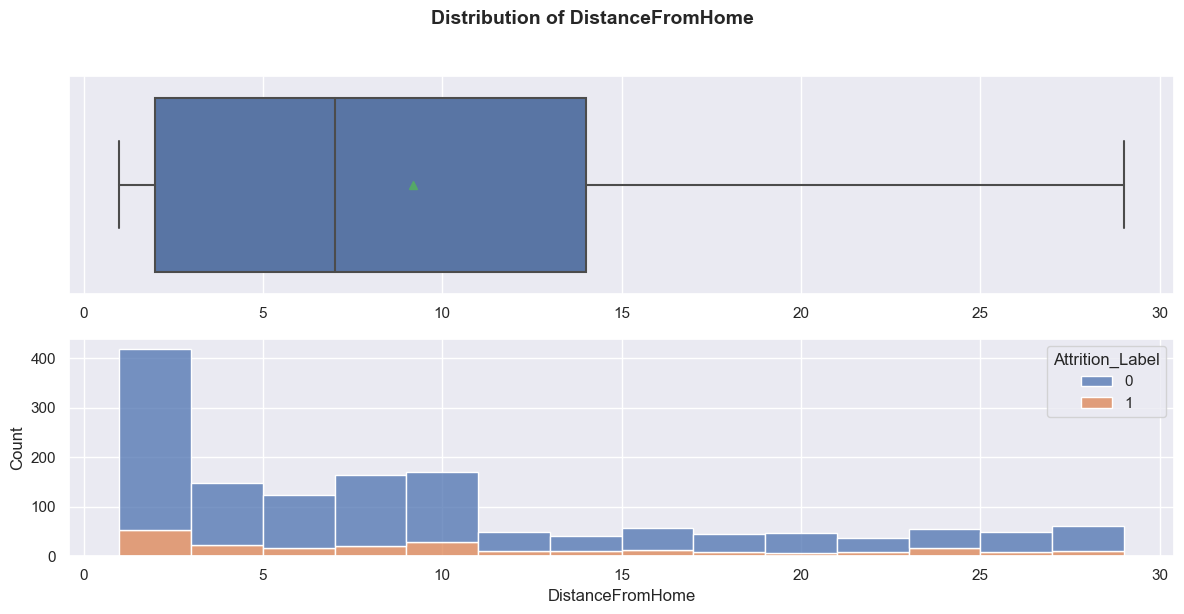

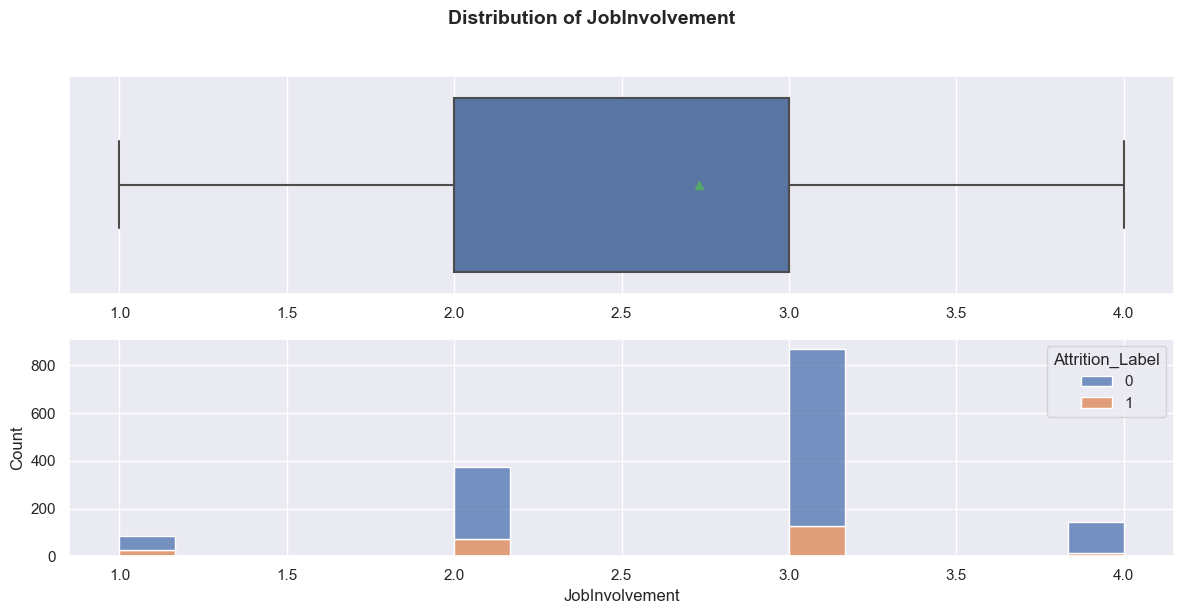

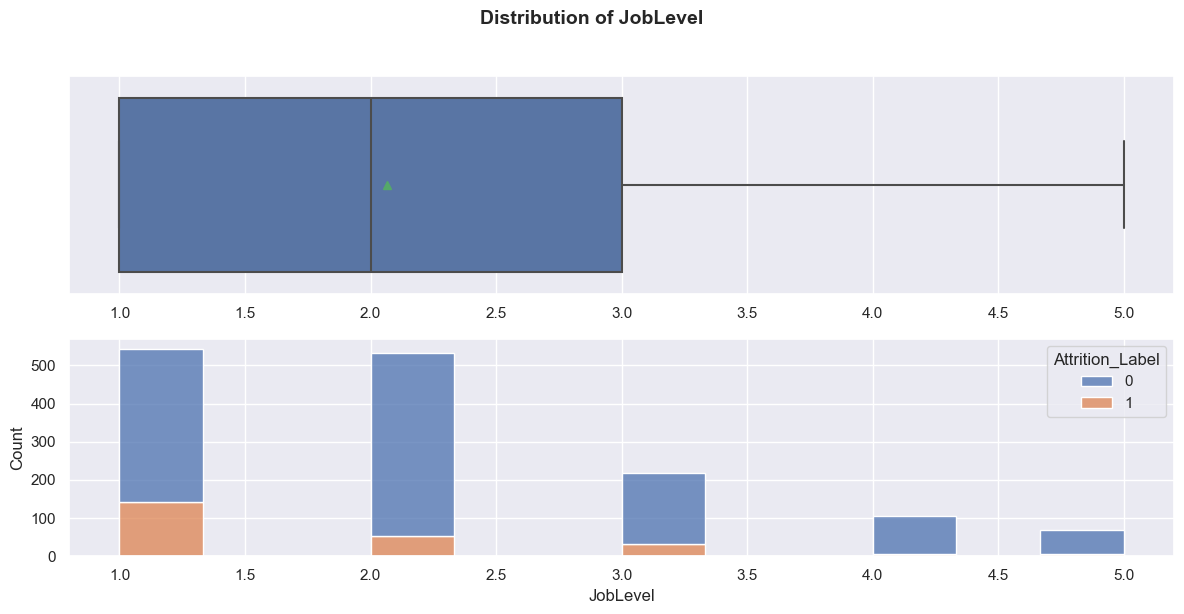

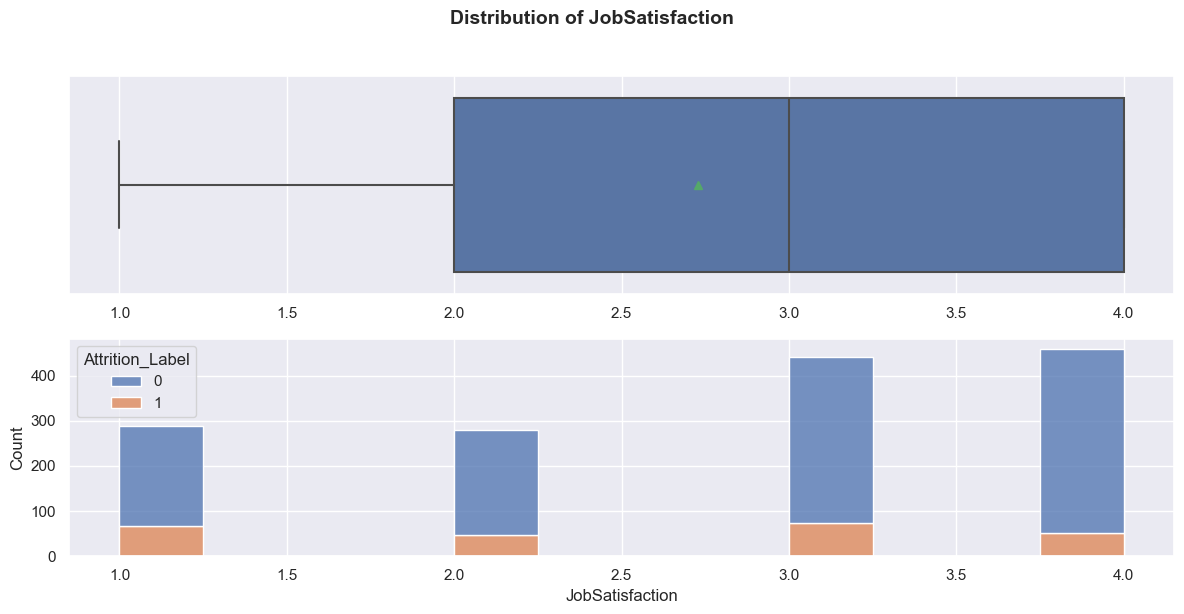

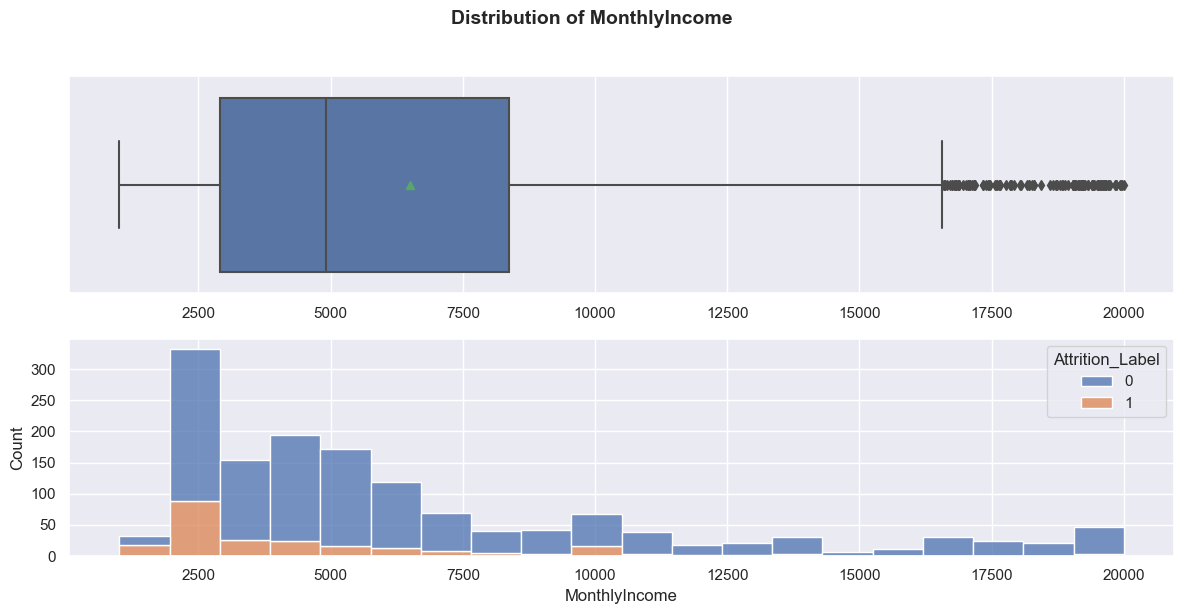

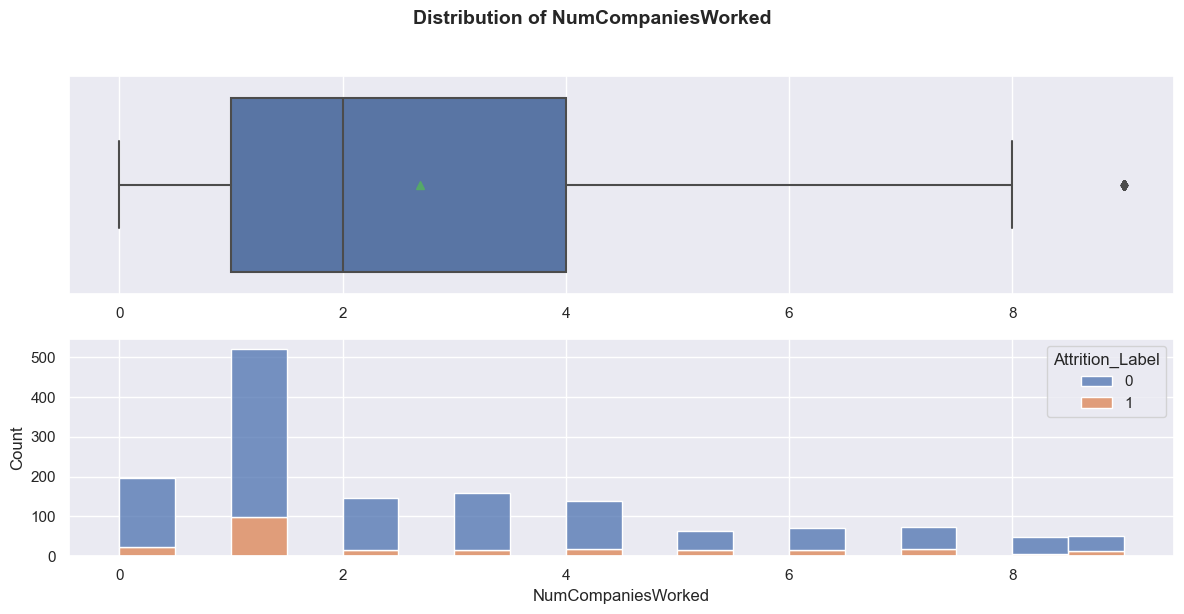

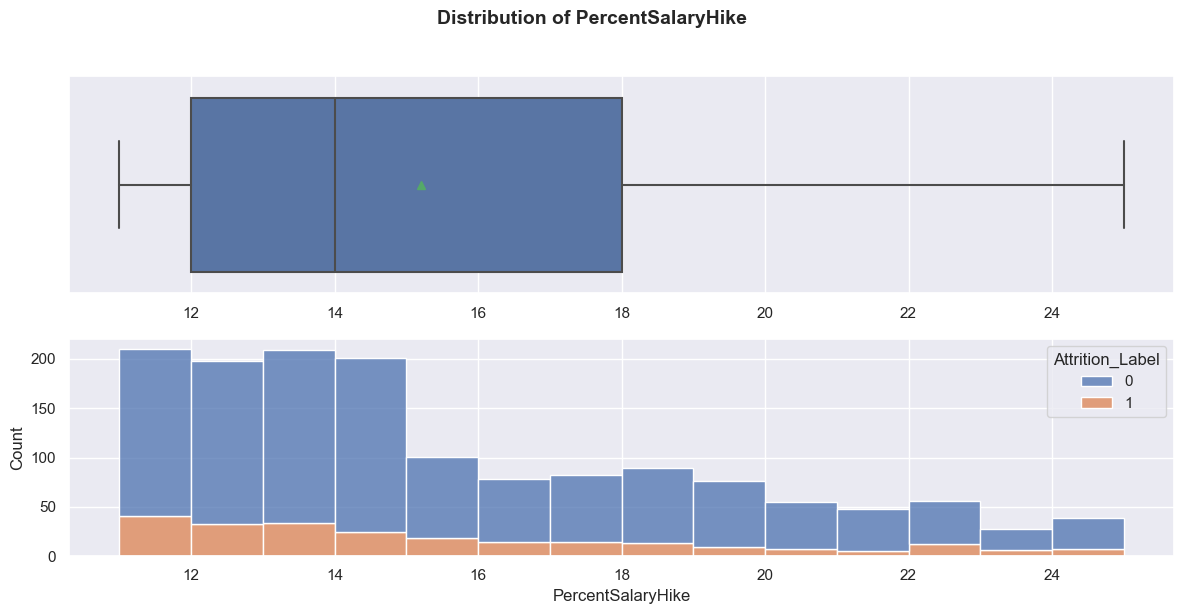

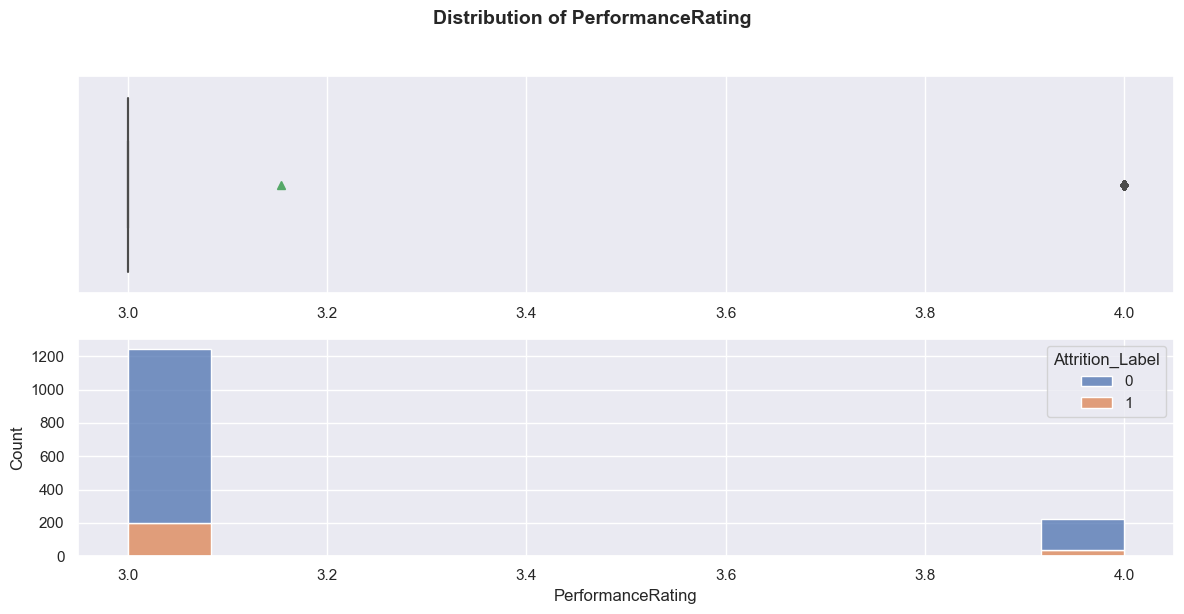

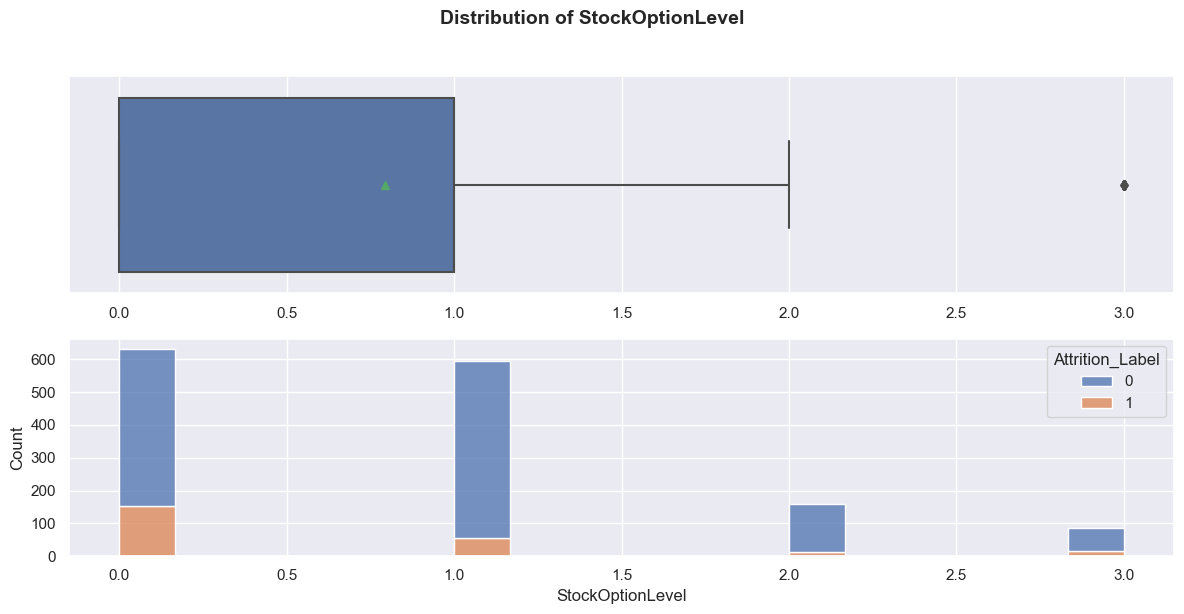

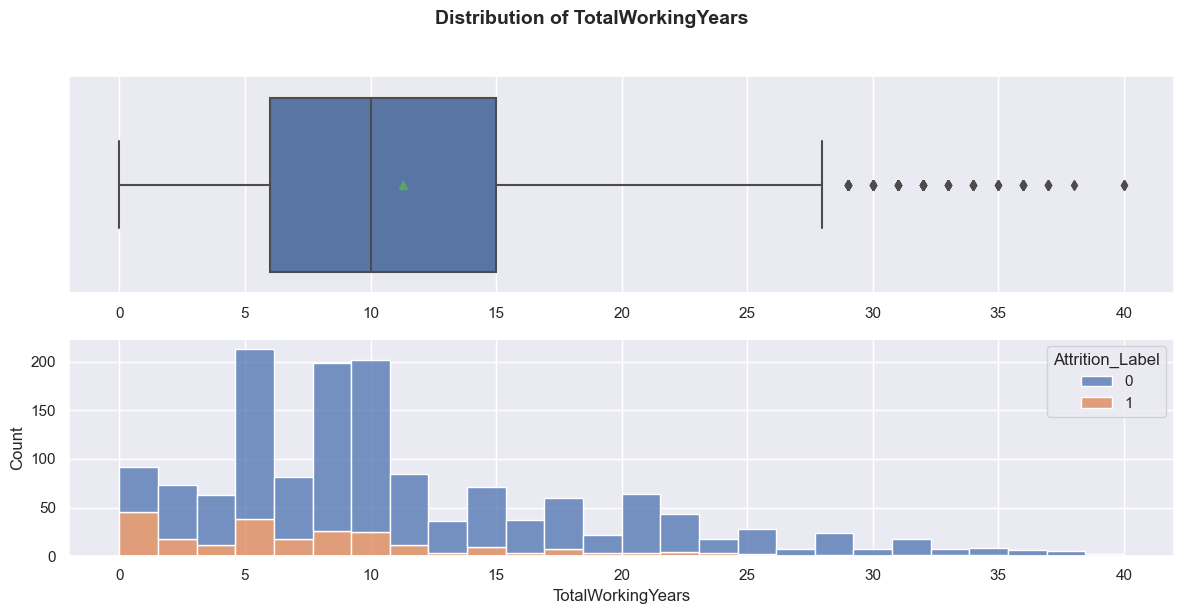

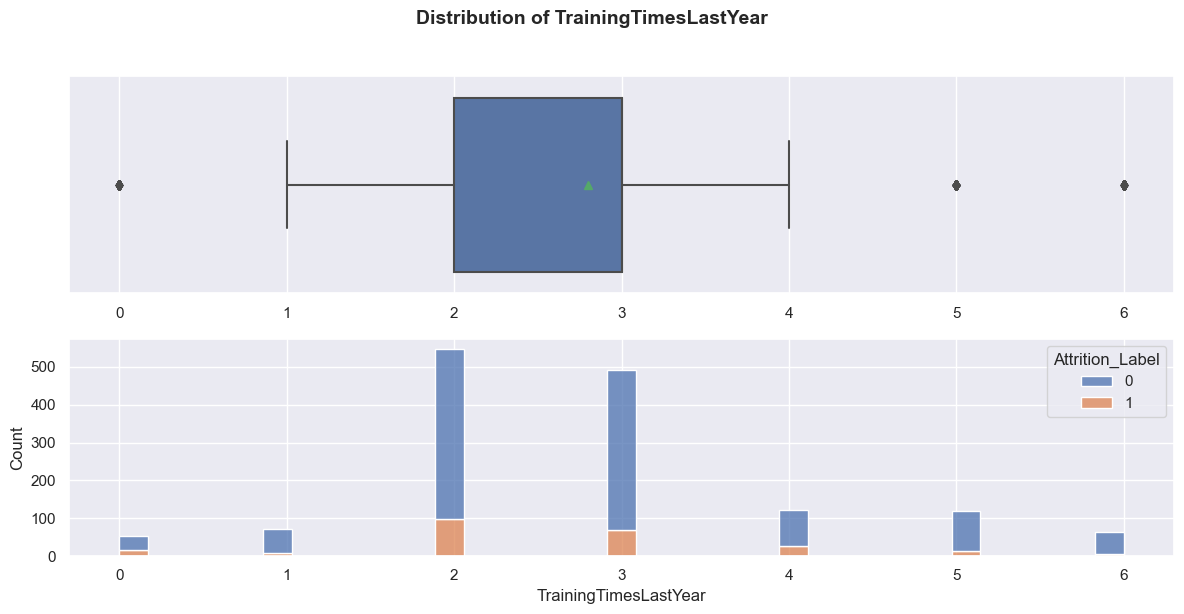

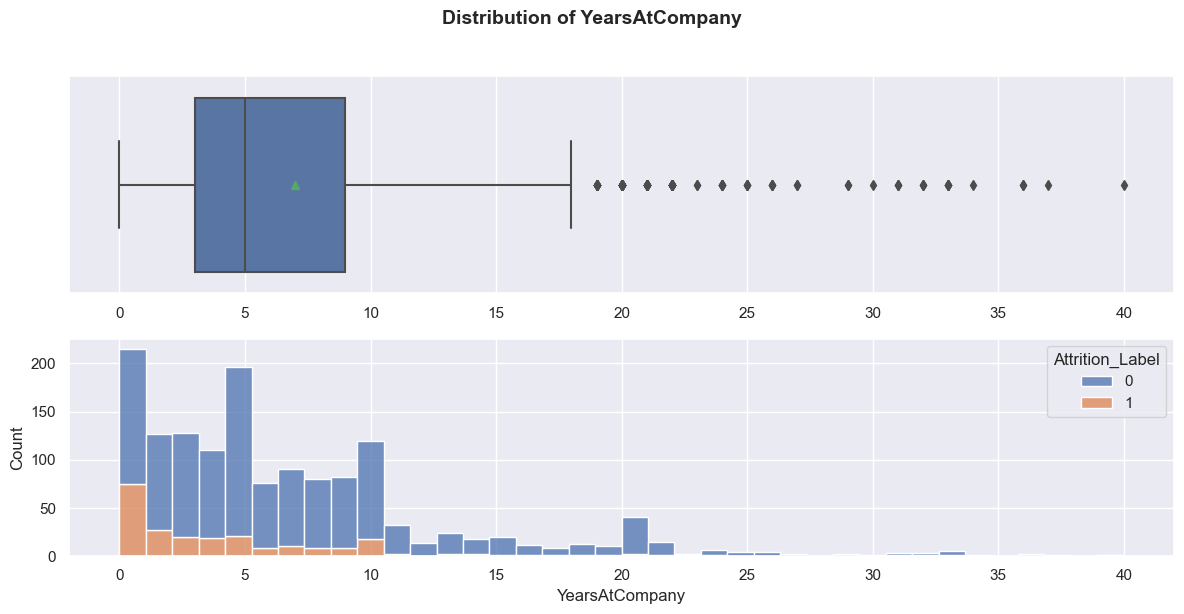

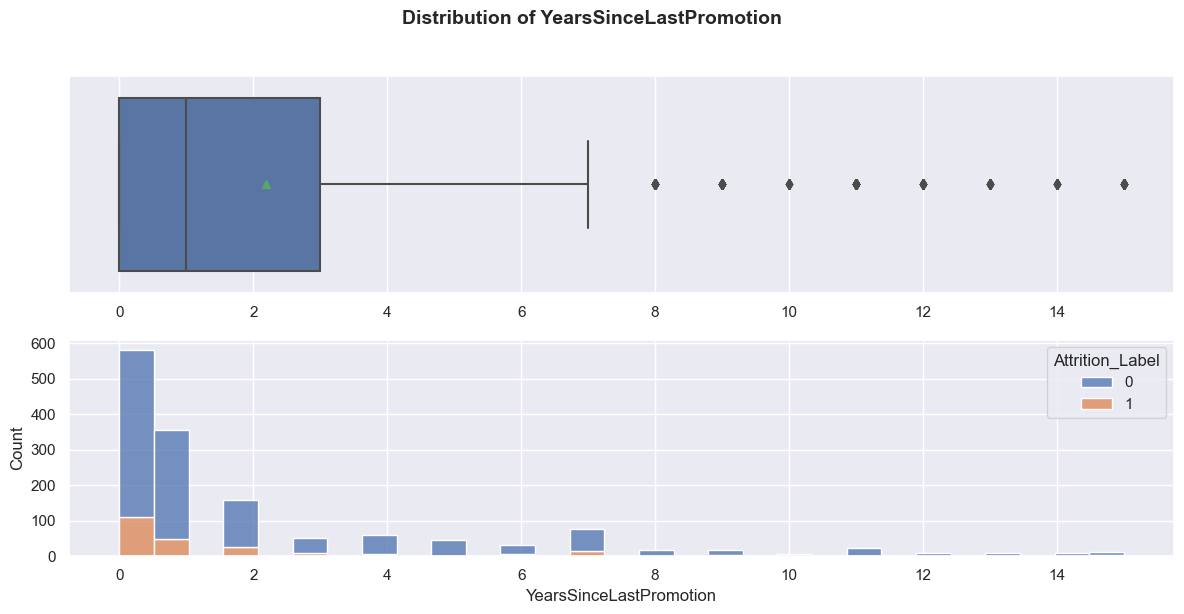

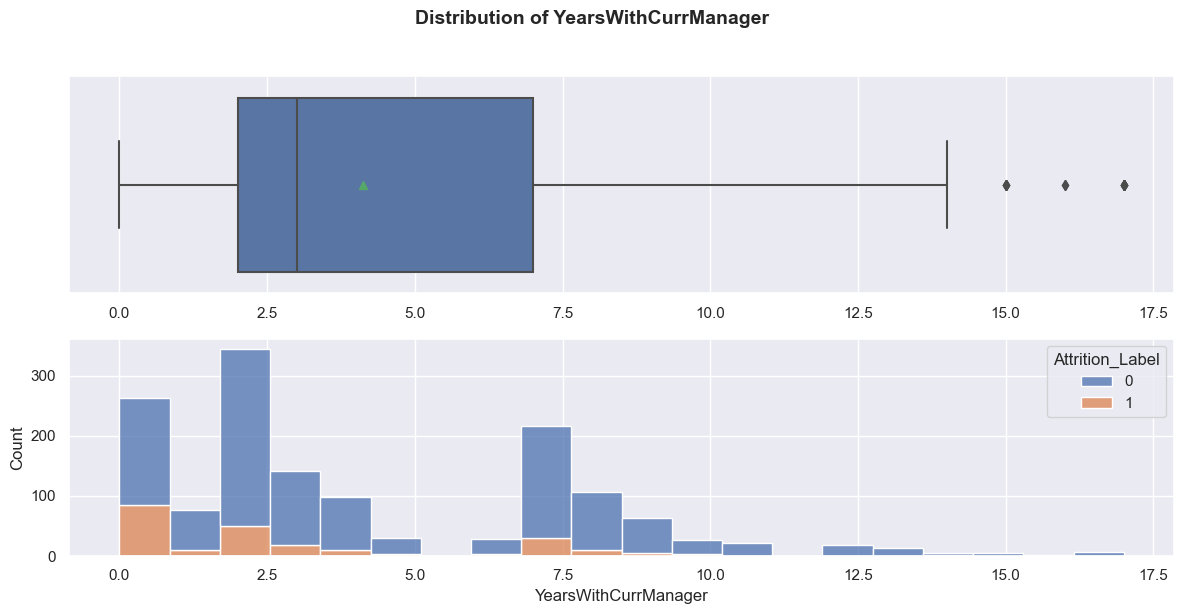

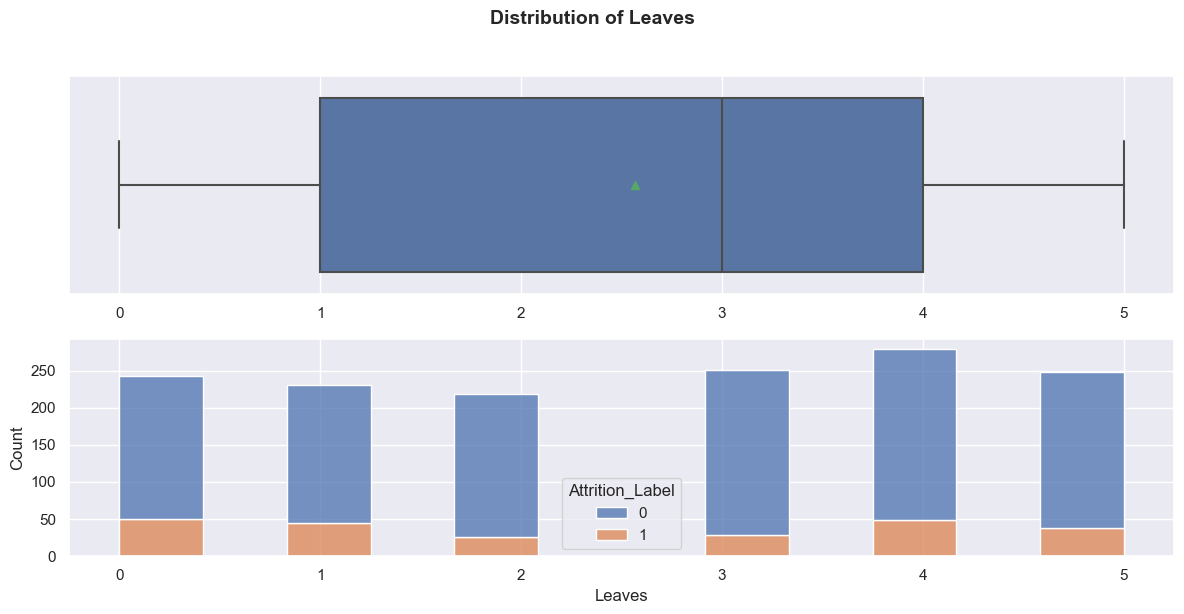

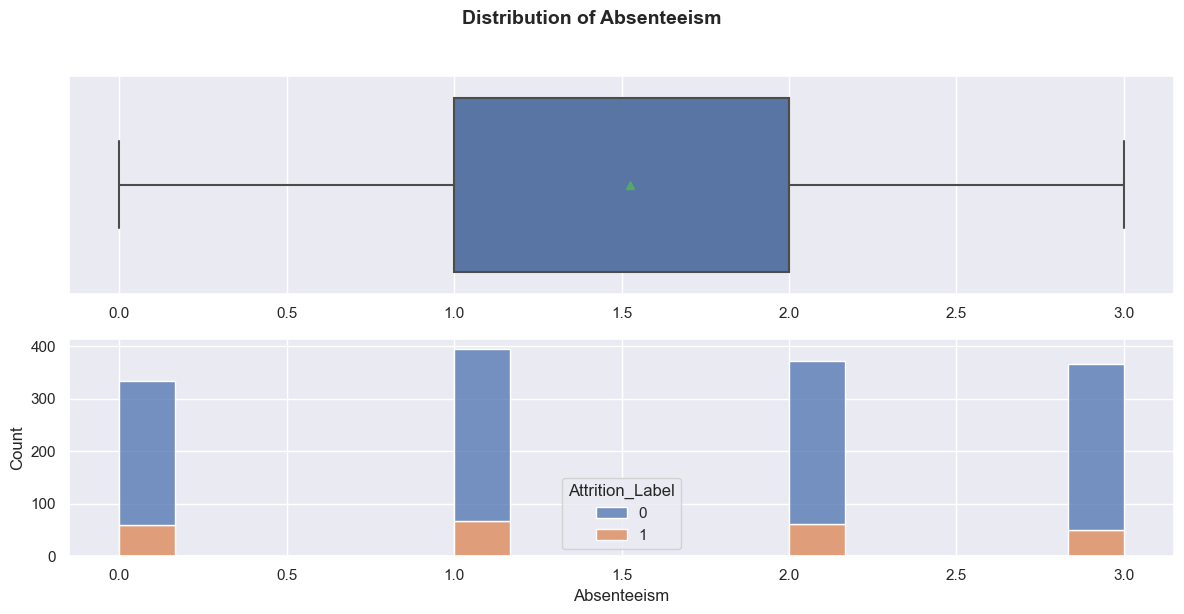

In [977]:
plot_all_distributions(df)

**A few observations**

- Lower job levels, lower monthly income, and less years working visually appear to have higher attrition
- Intuitively, this makes sense -- if an employee leaves they are not going to move up the levels or income
- Without getting into modeling, this would suggest that lower level, less tenured employees may need more intervention or support to try to mitigate attrition risk

- Interestingly, upon visual inspection only, there does not appear to be a very strong relationship between lower job satisfaction and attrition.  We'll explore this further with a more concrete correlation matrix, but I found this initial visual observation interesting


**Correlation matrix**

Let's produce a correlation matrix that will help us understand relationships between variables

This will also help us understand possible correlations or collinearity between variables that can help us decide if there are other variables we should remove



<Axes: >

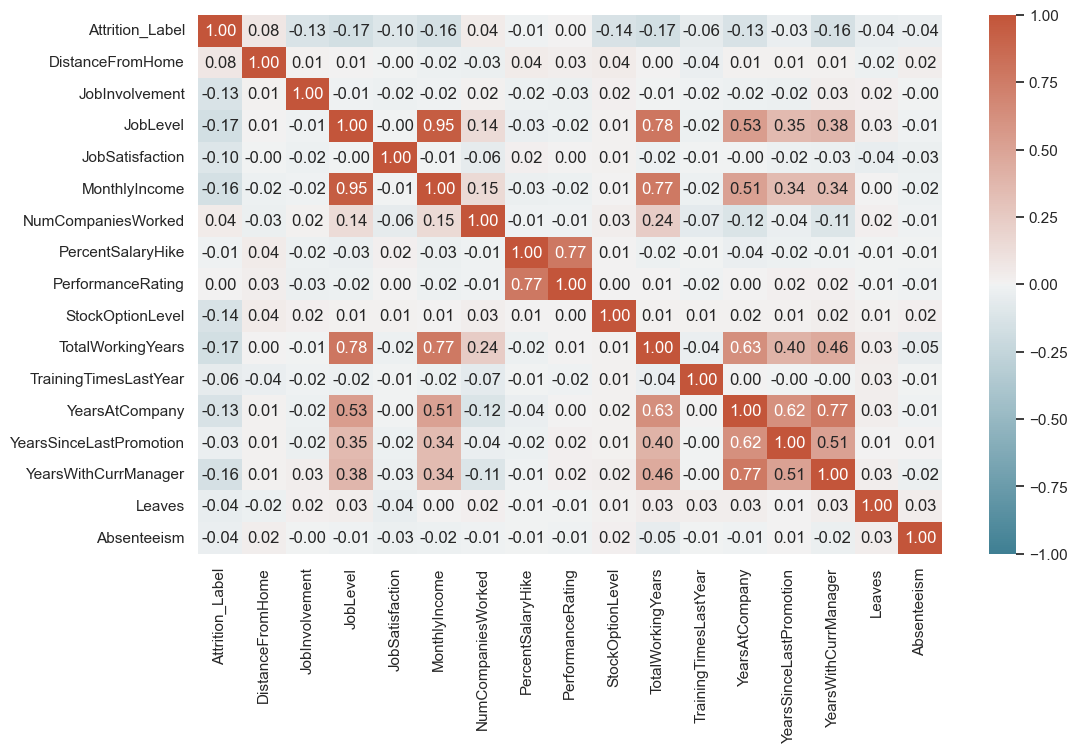

In [978]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), 
            annot=True, 
            vmin=-1, 
            vmax=1, 
            fmt=".2f", 
            cmap=sns.diverging_palette(220, 20, as_cmap=True, center='light'))  


**Observations from Correlation Matrix on Highly Correlated Variables:**

- JobLevel and MonthlyIncome are very Highly Correlated (.95)
    - Due to changing nature over time of Monthly Income (driven by inflation or company performance), I'll remove this variable to try to ensure better generalization on future unseen data
- JobLevel and TotalWorkingYears are Highly Correlated (~0.8)
    - Despite the correlation, I'm choosing to keep both of these variables.  There could be something to learn in cases where there is a disconnect beteween years and level
- YearsAtCompany and YearsWithCurrManager are Highly Correlated (~0.8)
    - Despite the correlation, I'm choosing to keep both of these variables.  Despite the correlation, I think these are different enough variables by definition to warrant including both
- Percent Salary Hike and Performance Rating are Highly Correlated (~0.8)
    - Considering the limited distributon of Performance Rating, with such a high % at 3, I'm going to remove Performance Rating

In [979]:
#Dropping columns noted above

data.drop(columns=['MonthlyIncome','PerformanceRating'],
          inplace=True,
          errors='ignore') 

#Confirm columns are dropped:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition_Label                    1470 non-null   int64
 1   DistanceFromHome                   1470 non-null   int64
 2   JobInvolvement                     1470 non-null   int64
 3   JobLevel                           1470 non-null   int64
 4   JobSatisfaction                    1470 non-null   int64
 5   NumCompaniesWorked                 1470 non-null   int64
 6   OverTime                           1470 non-null   int32
 7   PercentSalaryHike                  1470 non-null   int64
 8   StockOptionLevel                   1470 non-null   int64
 9   TotalWorkingYears                  1470 non-null   int64
 10  TrainingTimesLastYear              1470 non-null   int64
 11  YearsAtCompany                     1470 non-null   int64
 12  YearsSinceLastPromot

---------
## **Data Preparation for Modeling (Setting Target Variable and Split Train/Test)**
---------

**Separating the independent variables (X) and the dependent variable (Y)**

Attrition_Label column is our dependent (target) variable for Y in this model

In [980]:
# Separating target variable and other variables
X=data.drop(columns='Attrition_Label')
Y=data['Attrition_Label']

**Train / Test Split**

We will use 70/30 split and Stratify so we keep same proportions of 1/0 in Train/Test

In [981]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

In [982]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

DistanceFromHome                     0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
Leaves                               0
Absenteeism                          0
Work_accident                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientis

--------
## **Model Development**

We will be building 6 different models:

- **Logistic Regression**
- **Support Vector Classifier**
- **Decision Tree**
- **Random Forest**
- **AdaBoost**
- **XGBoost**

As we progress through each model, we will include observations about performance along the way

--------

### **Model Diagnostics Function**
Before building the actual models, let's construct a function that will give us a nice visual representation of model diagnostics like Confusion Matrix and ROC

In [983]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')

    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(actual, predicted)
    plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

----------
### **Logistic Regression**
----------

**Train the Model**

In [984]:
# Train the model
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Get predicted probabilities for the training set
y_prob_train = lg.predict_proba(X_train)[:, 1]

# Convert probabilities to binary predictions
y_pred_train = (y_prob_train >= 0.5).astype(int)  


**Check Performance on Training Set**

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       863
           1       0.85      0.45      0.59       166

    accuracy                           0.90      1029
   macro avg       0.88      0.72      0.77      1029
weighted avg       0.90      0.90      0.89      1029



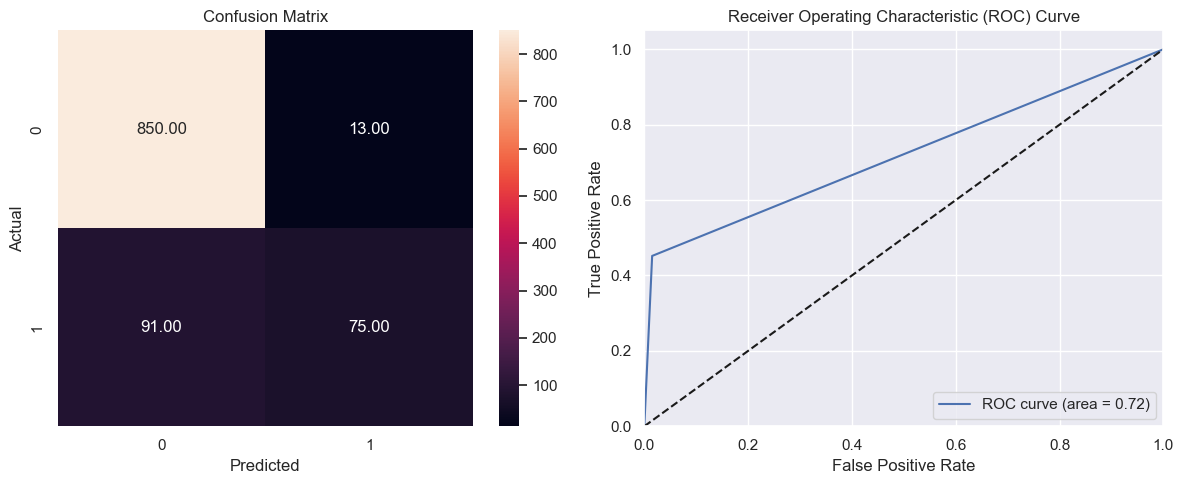

In [985]:
metrics_score(y_train, y_pred_train)

**Check Performance on Test Data**

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       370
           1       0.61      0.35      0.45        71

    accuracy                           0.86       441
   macro avg       0.75      0.65      0.68       441
weighted avg       0.84      0.86      0.84       441



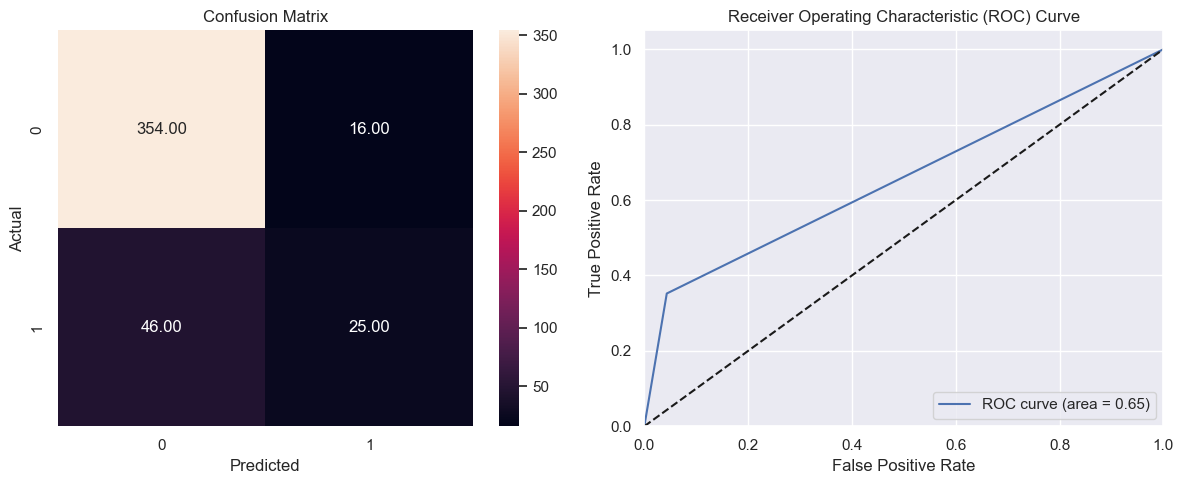

In [986]:
y_prob_test = lg.predict_proba(X_test)[:, 1]

y_pred_test = (y_prob_test >= 0.5).astype(int)  

metrics_score(y_test, y_pred_test)


**Observation**

Overall model performance is not very strong.  The Test Data has ROC barely above .5, with very low accuracy on the 1=Attrition case, which is most important here.

**Finding Optimal Threshold**

Considering the imbalanced distribution of 1/0, I will assess the threshold to apply to predict Attrition=1.  

We'll run through the model again with an adjusted threshold.

Let's think about the use case here though -- I would like to cast a wider net on those that could have attrition risk so I can be more proactive with intervention/programs.  Considering that, a false negative is more costly than a false positive.  As a result, I will consider Recall as an important metric as a I set my thresholds accordingly.

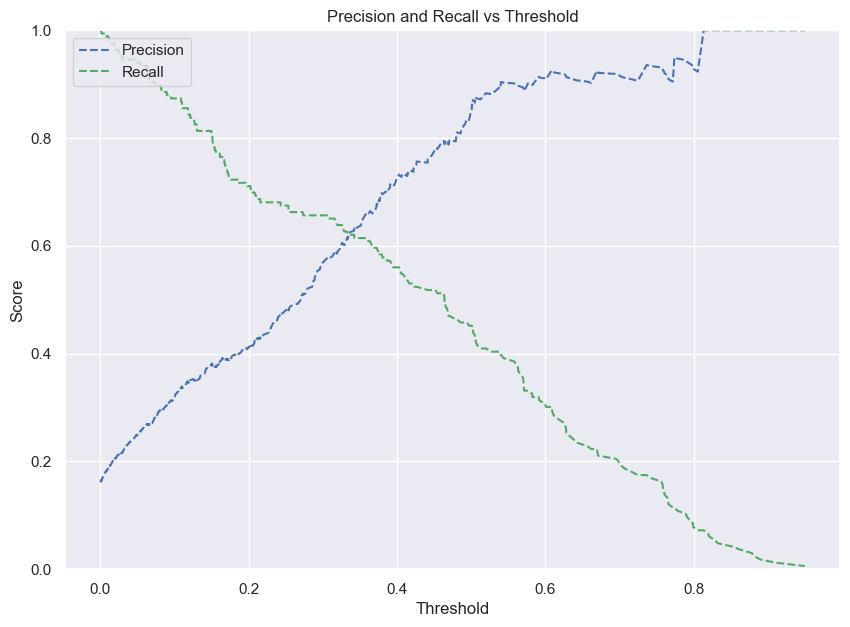

In [987]:
from sklearn.metrics import precision_recall_curve

precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_prob_train)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_lr, precisions_lr[:-1], 'b--', label='Precision')
plt.plot(thresholds_lr, recalls_lr[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()


I can modify the optimal threshold below based on the tradeoff between precision and recall.  Keep in mind that I'm prioritizing Recall over Precision for this use case.

In [988]:
optimal_threshold_lg=0.15

**Check performance on train using optimal threshold**

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       863
           1       0.38      0.81      0.52       166

    accuracy                           0.76      1029
   macro avg       0.67      0.78      0.68      1029
weighted avg       0.86      0.76      0.78      1029



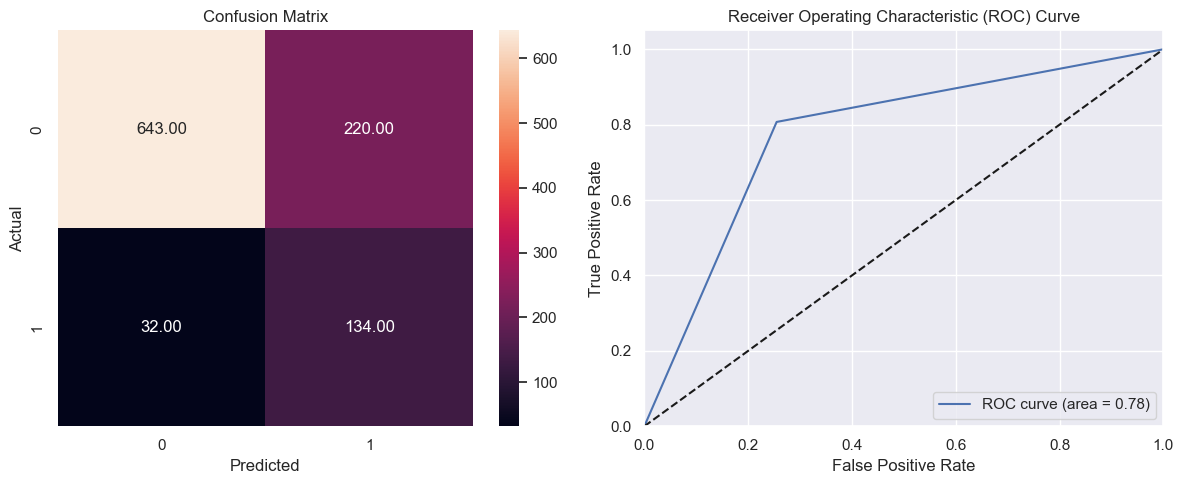

In [989]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_prob_train = lg.predict_proba(X_train)[:, 1]

y_pred_train = (y_prob_train >= optimal_threshold_lg).astype(int) 

metrics_score(y_train, y_pred_train)

**Check performance on test using optimal threshold**

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       370
           1       0.34      0.65      0.44        71

    accuracy                           0.74       441
   macro avg       0.63      0.70      0.64       441
weighted avg       0.82      0.74      0.77       441



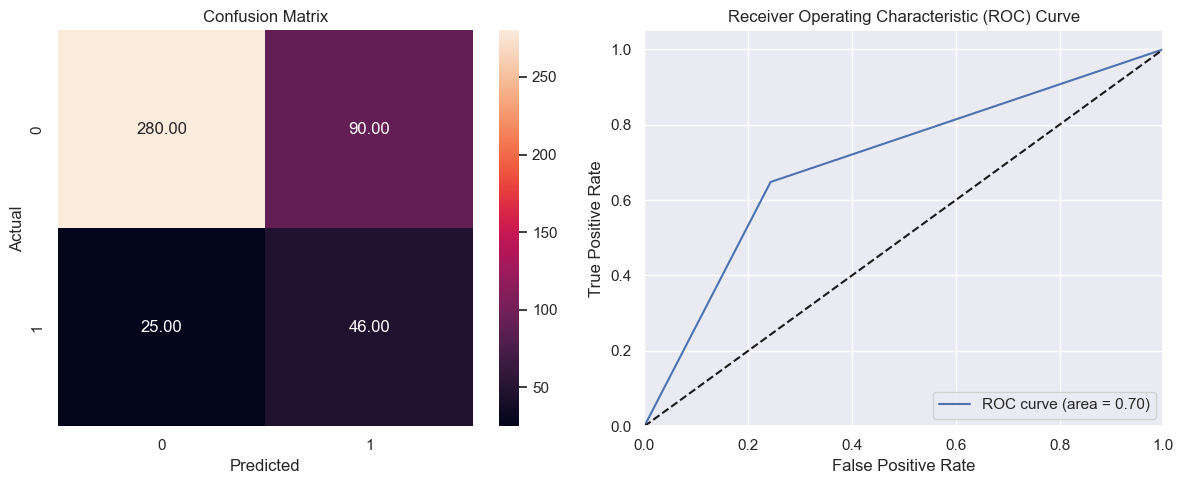

In [990]:
y_prob_test = lg.predict_proba(X_test)[:, 1]

y_pred_test = (y_prob_test >= optimal_threshold_lg).astype(int)  # Use the previously determined optimal threshold

metrics_score(y_test, y_pred_test)


**Logistic Regression Final Observations**

By adjusting the threshold down, I've prioritized Recall over Precision.  My AUC is now higher on Test Data than it was with the default threshold.

This helps with the model performance for this use case where false negatives are most costly than false positives.  

Even though I've sacrificed some overall accuracy, I'm comfortable with that due to the imbalanced nature of the dataset and the implications of costly false negatives in terms of attrition.

**Verdict: Logistic Regression model with revised threshold has acceptable performance to help predict attrition risk**

----------
### **Support Vector Classifier**
----------

For SVC we will need to scale the data

In [991]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the model using **Linear Kernel**




#### **Build a Support Vector Machine model using a linear kernel**

In [992]:
svm = SVC(kernel='linear',probability=True) 
model = svm.fit(X= X_train_scaled, y = y_train)

#### **Check the performance of the model on train data**

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       863
           1       0.86      0.45      0.59       166

    accuracy                           0.90      1029
   macro avg       0.88      0.72      0.76      1029
weighted avg       0.90      0.90      0.89      1029



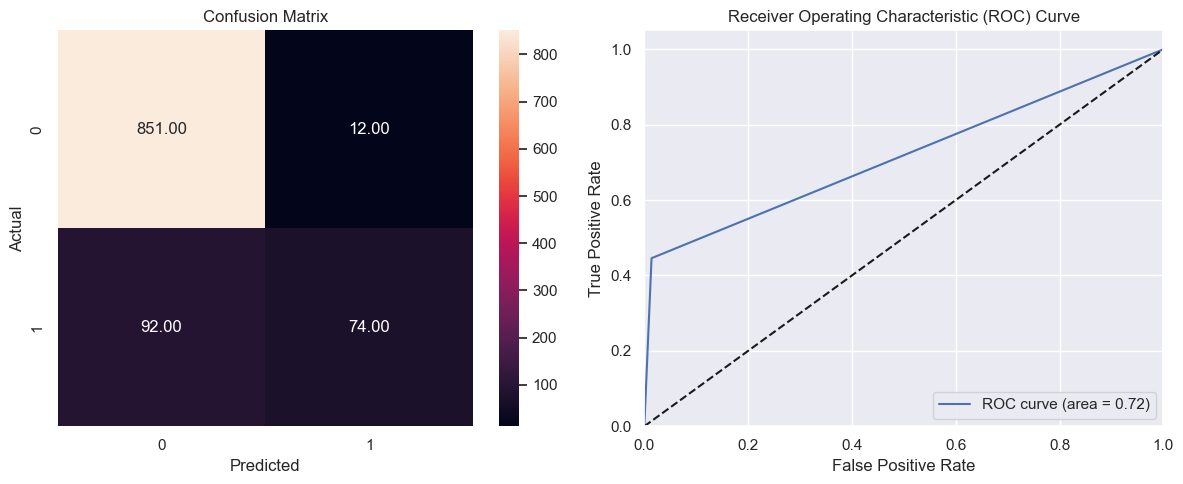

In [993]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

**Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.59      0.31      0.41        71

    accuracy                           0.85       441
   macro avg       0.74      0.63      0.66       441
weighted avg       0.83      0.85      0.84       441



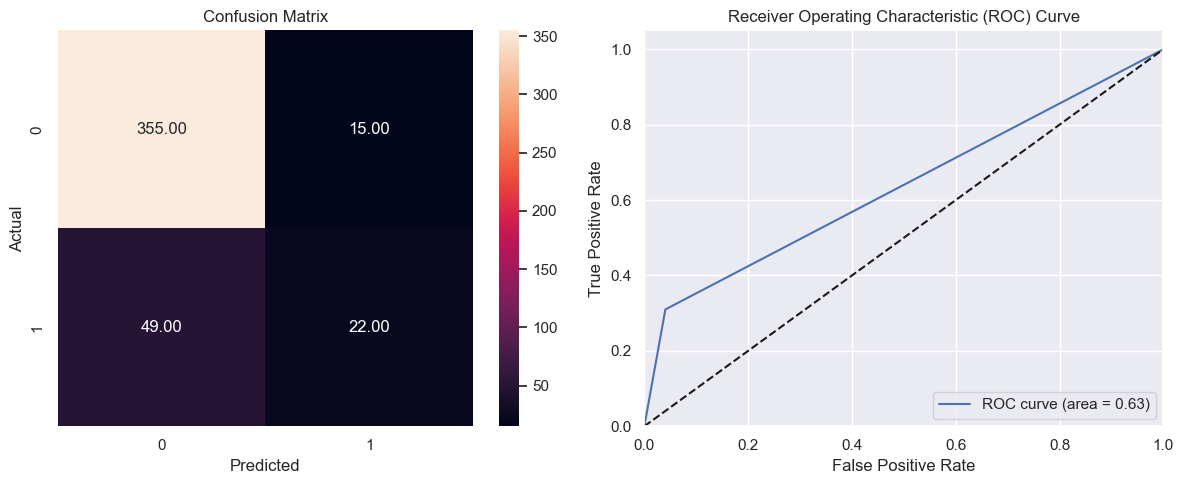

In [994]:
y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

**Observation**

Overall model performance is extremely poor and no better than having no model at all.  The Train and Test both have 0.5 AUC and predict nothing as 1.  This is driven by the highly imbalanced data set, so we should consider changing the threshold for classiciation as 1, which we'll do in the following step.

**Finding Optimal Threshold**

Considering the imbalanced distribution of 1/0, I will assess the threshold to apply to predict Attrition=1.  

We'll run through the model again with an adjusted threshold.

Let's think about the use case here though -- I would like to cast a wider net on those that could have attrition risk so I can be more proactive with intervention/programs.  Considering that, a false negative is more costly than a false positive.  As a result, I will consider Recall as an important metric as a I set my thresholds accordingly.


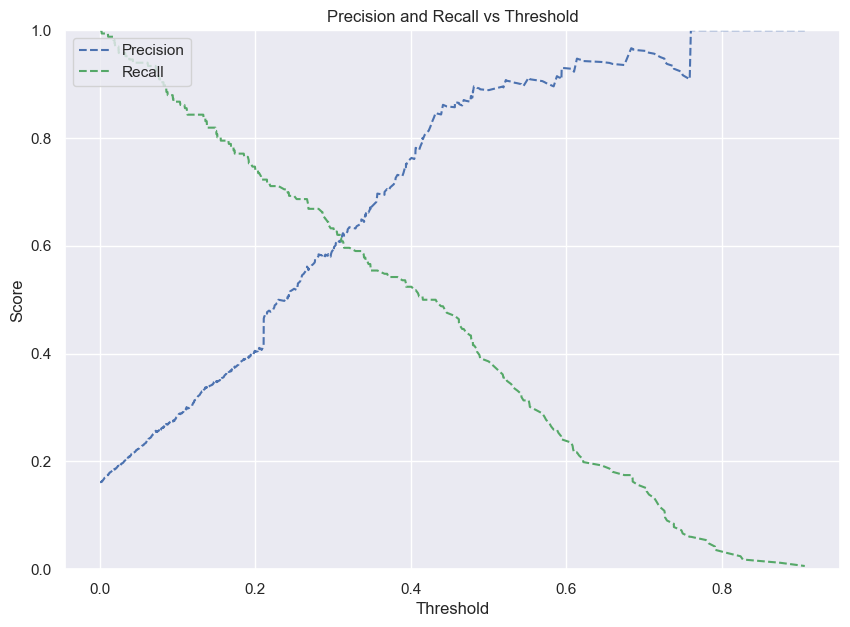

In [995]:
y_scores_svm = model.predict_proba(X_train_scaled)
y_scores_svm_pos = y_scores_svm[:, 1]  # Get probabilities for positive class

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm_pos)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='Precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()


I can modify the optimal threshold below based on the tradeoff between precision and recall.  Keep in mind that I'm prioritizing Recall over Precision for this use case.

In [996]:
optimal_threshold_svm=.15

**Check performance on train using optimal threshold**

              precision    recall  f1-score   support

           0       0.95      0.71      0.81       863
           1       0.35      0.81      0.49       166

    accuracy                           0.72      1029
   macro avg       0.65      0.76      0.65      1029
weighted avg       0.85      0.72      0.76      1029



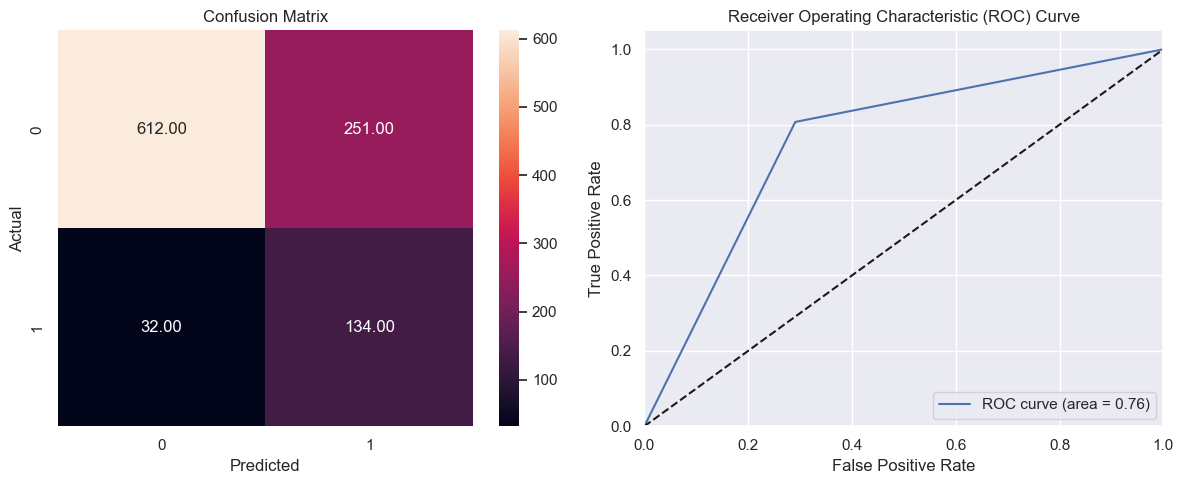

In [997]:
y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

**Check the performance of the model on test data using the optimal threshold**

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       370
           1       0.33      0.66      0.44        71

    accuracy                           0.73       441
   macro avg       0.62      0.70      0.63       441
weighted avg       0.82      0.73      0.76       441



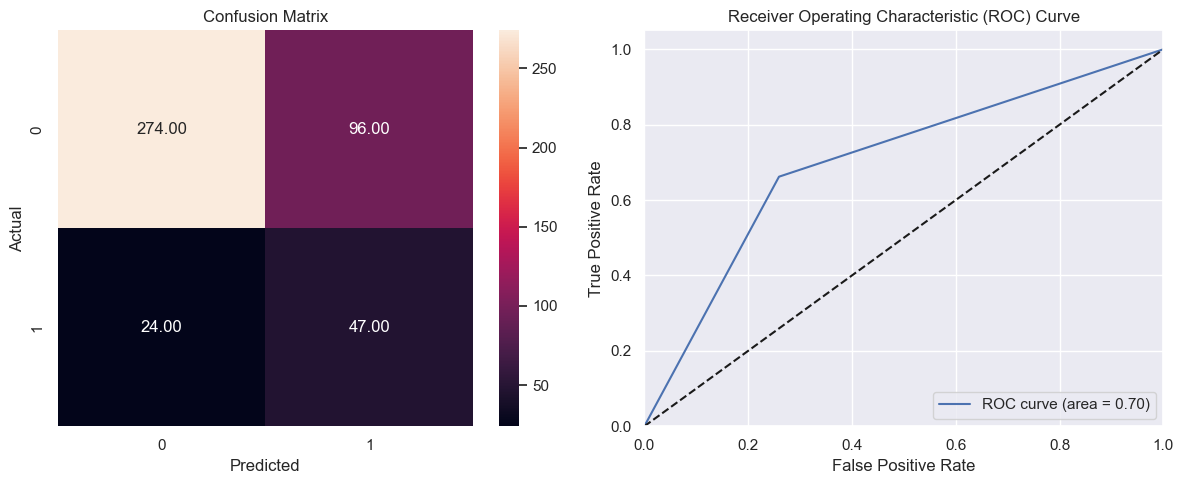

In [998]:
y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

**SVC Final Observations**

Similar to Logistic Regression -- By adjusting the threshold down, I've prioritized Recall over Precision.  My AUC is now higher on Test Data than it was with the default threshold.

This helps with the model performance for this use case where false negatives are most costly than false positives.  

Even though I've sacrificed some overall accuracy, I'm comfortable with that due to the imbalanced nature of the dataset and the implications of costly false negatives in terms of attrition.

**Verdict: SVC model with revised threshold has acceptable performance to help predict attrition risk**

---------
### **Decision Trees**
---------

**Build a Decision Tree Model**

In [999]:
model_dt = DecisionTreeClassifier(
    random_state=1,
    max_depth=5,
    min_samples_split=25,
    min_samples_leaf=25
)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=25,
                       random_state=1)

**Check the performance of the model on train data**

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       863
           1       0.63      0.39      0.48       166

    accuracy                           0.86      1029
   macro avg       0.76      0.67      0.70      1029
weighted avg       0.85      0.86      0.85      1029



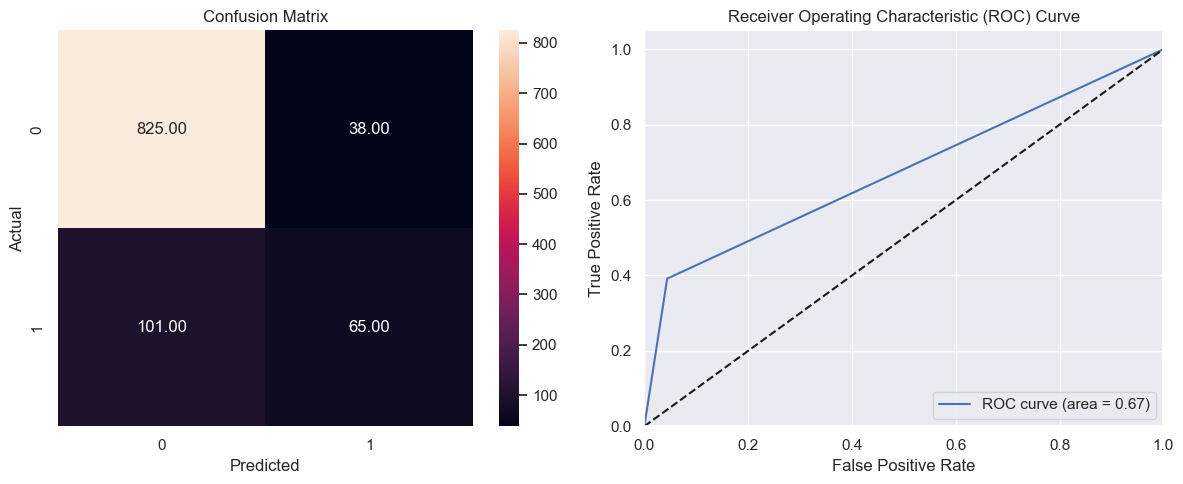

In [1000]:
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Checking model performance on test set**

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       370
           1       0.51      0.34      0.41        71

    accuracy                           0.84       441
   macro avg       0.70      0.64      0.66       441
weighted avg       0.82      0.84      0.83       441



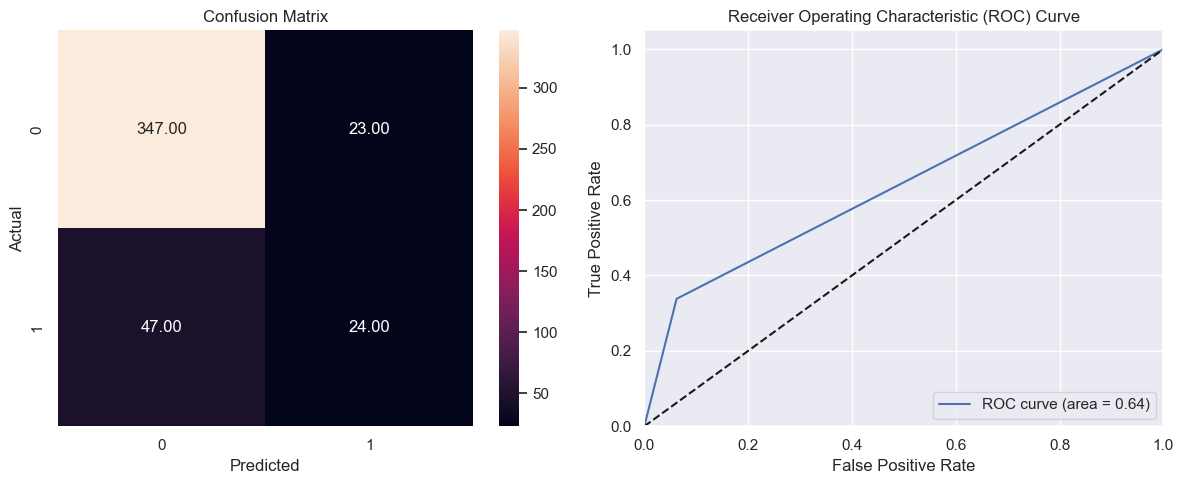

In [1001]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation**

Overall model performance is ok but not overly strong.  The test data does not have strong accuracy or recall on Attrition=1, which is our priority here.

**Finding Optimal Threshold**

Similar to the previous models -- considering the imbalanced distribution of 1/0, I will assess the threshold to apply to predict Attrition=1.  

We'll run through the model again with an adjusted threshold.


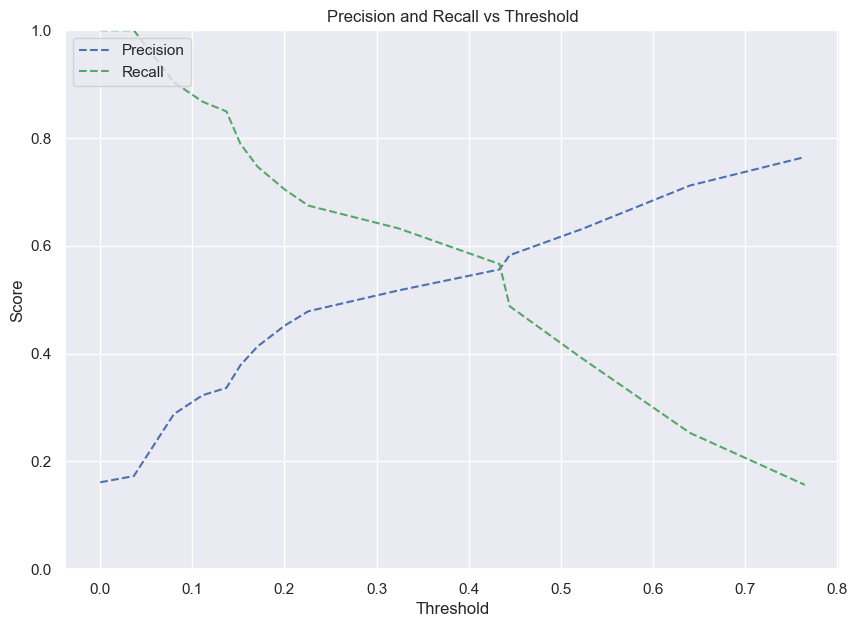

In [1002]:
y_scores_dt = model_dt.predict_proba(X_train)
y_scores_dt_pos = y_scores_dt[:, 1]  # Get probabilities for positive class

precisions_dt, recalls_dt, thresholds_dt = precision_recall_curve(y_train, y_scores_dt_pos)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_dt, precisions_dt[:-1], 'b--', label='Precision')
plt.plot(thresholds_dt, recalls_dt[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])
plt.show()

In [1003]:
optimal_threshold_dt = 0.15

**Check performance of the model on train data using optimal threshold**

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       863
           1       0.38      0.79      0.51       166

    accuracy                           0.76      1029
   macro avg       0.66      0.77      0.68      1029
weighted avg       0.86      0.76      0.79      1029



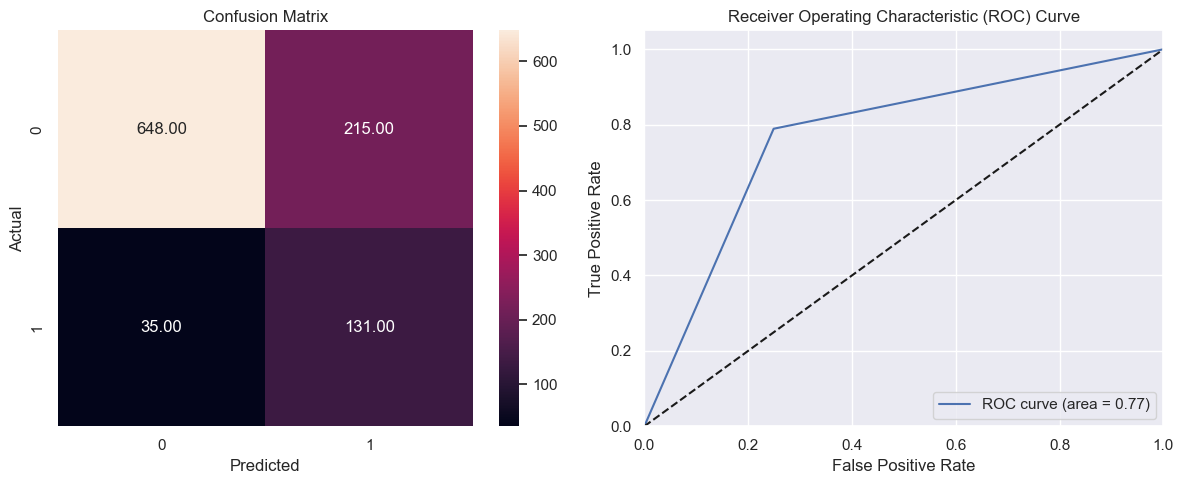

In [1004]:
y_pred_train_dt = model_dt.predict_proba(X_train)
metrics_score(y_train, y_pred_train_dt[:,1]>optimal_threshold_dt)

**Check performance of the model on test data using optimal threshold**

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       370
           1       0.30      0.61      0.40        71

    accuracy                           0.71       441
   macro avg       0.60      0.66      0.60       441
weighted avg       0.81      0.71      0.74       441



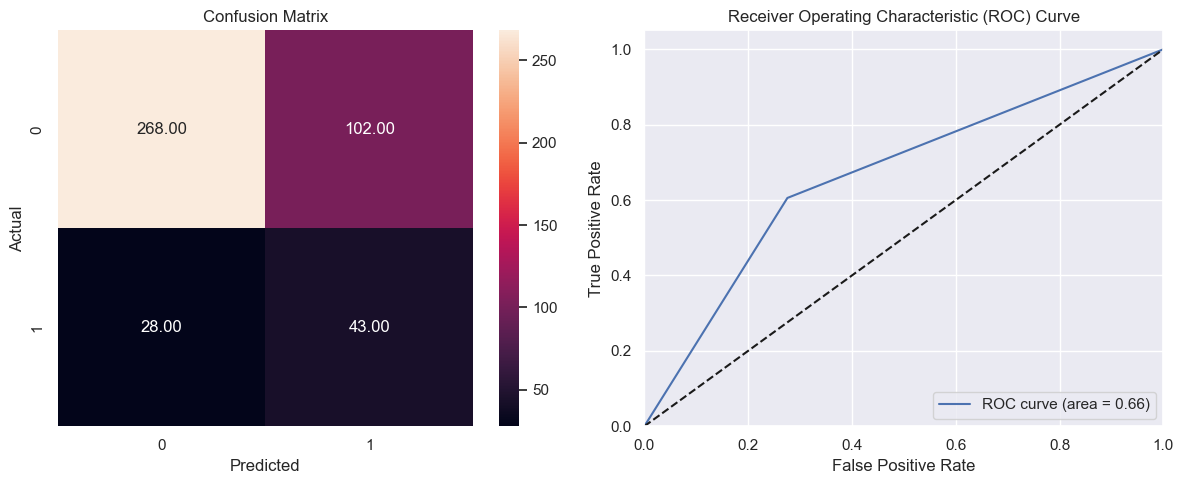

In [1005]:
y_pred_test_dt = model_dt.predict_proba(X_test)
metrics_score(y_test, y_pred_test_dt[:,1]>optimal_threshold_dt)

**Observations: performance was more acceptable for this use case when choosing the optimal threshold.**

**Visualizing the Decision Tree**

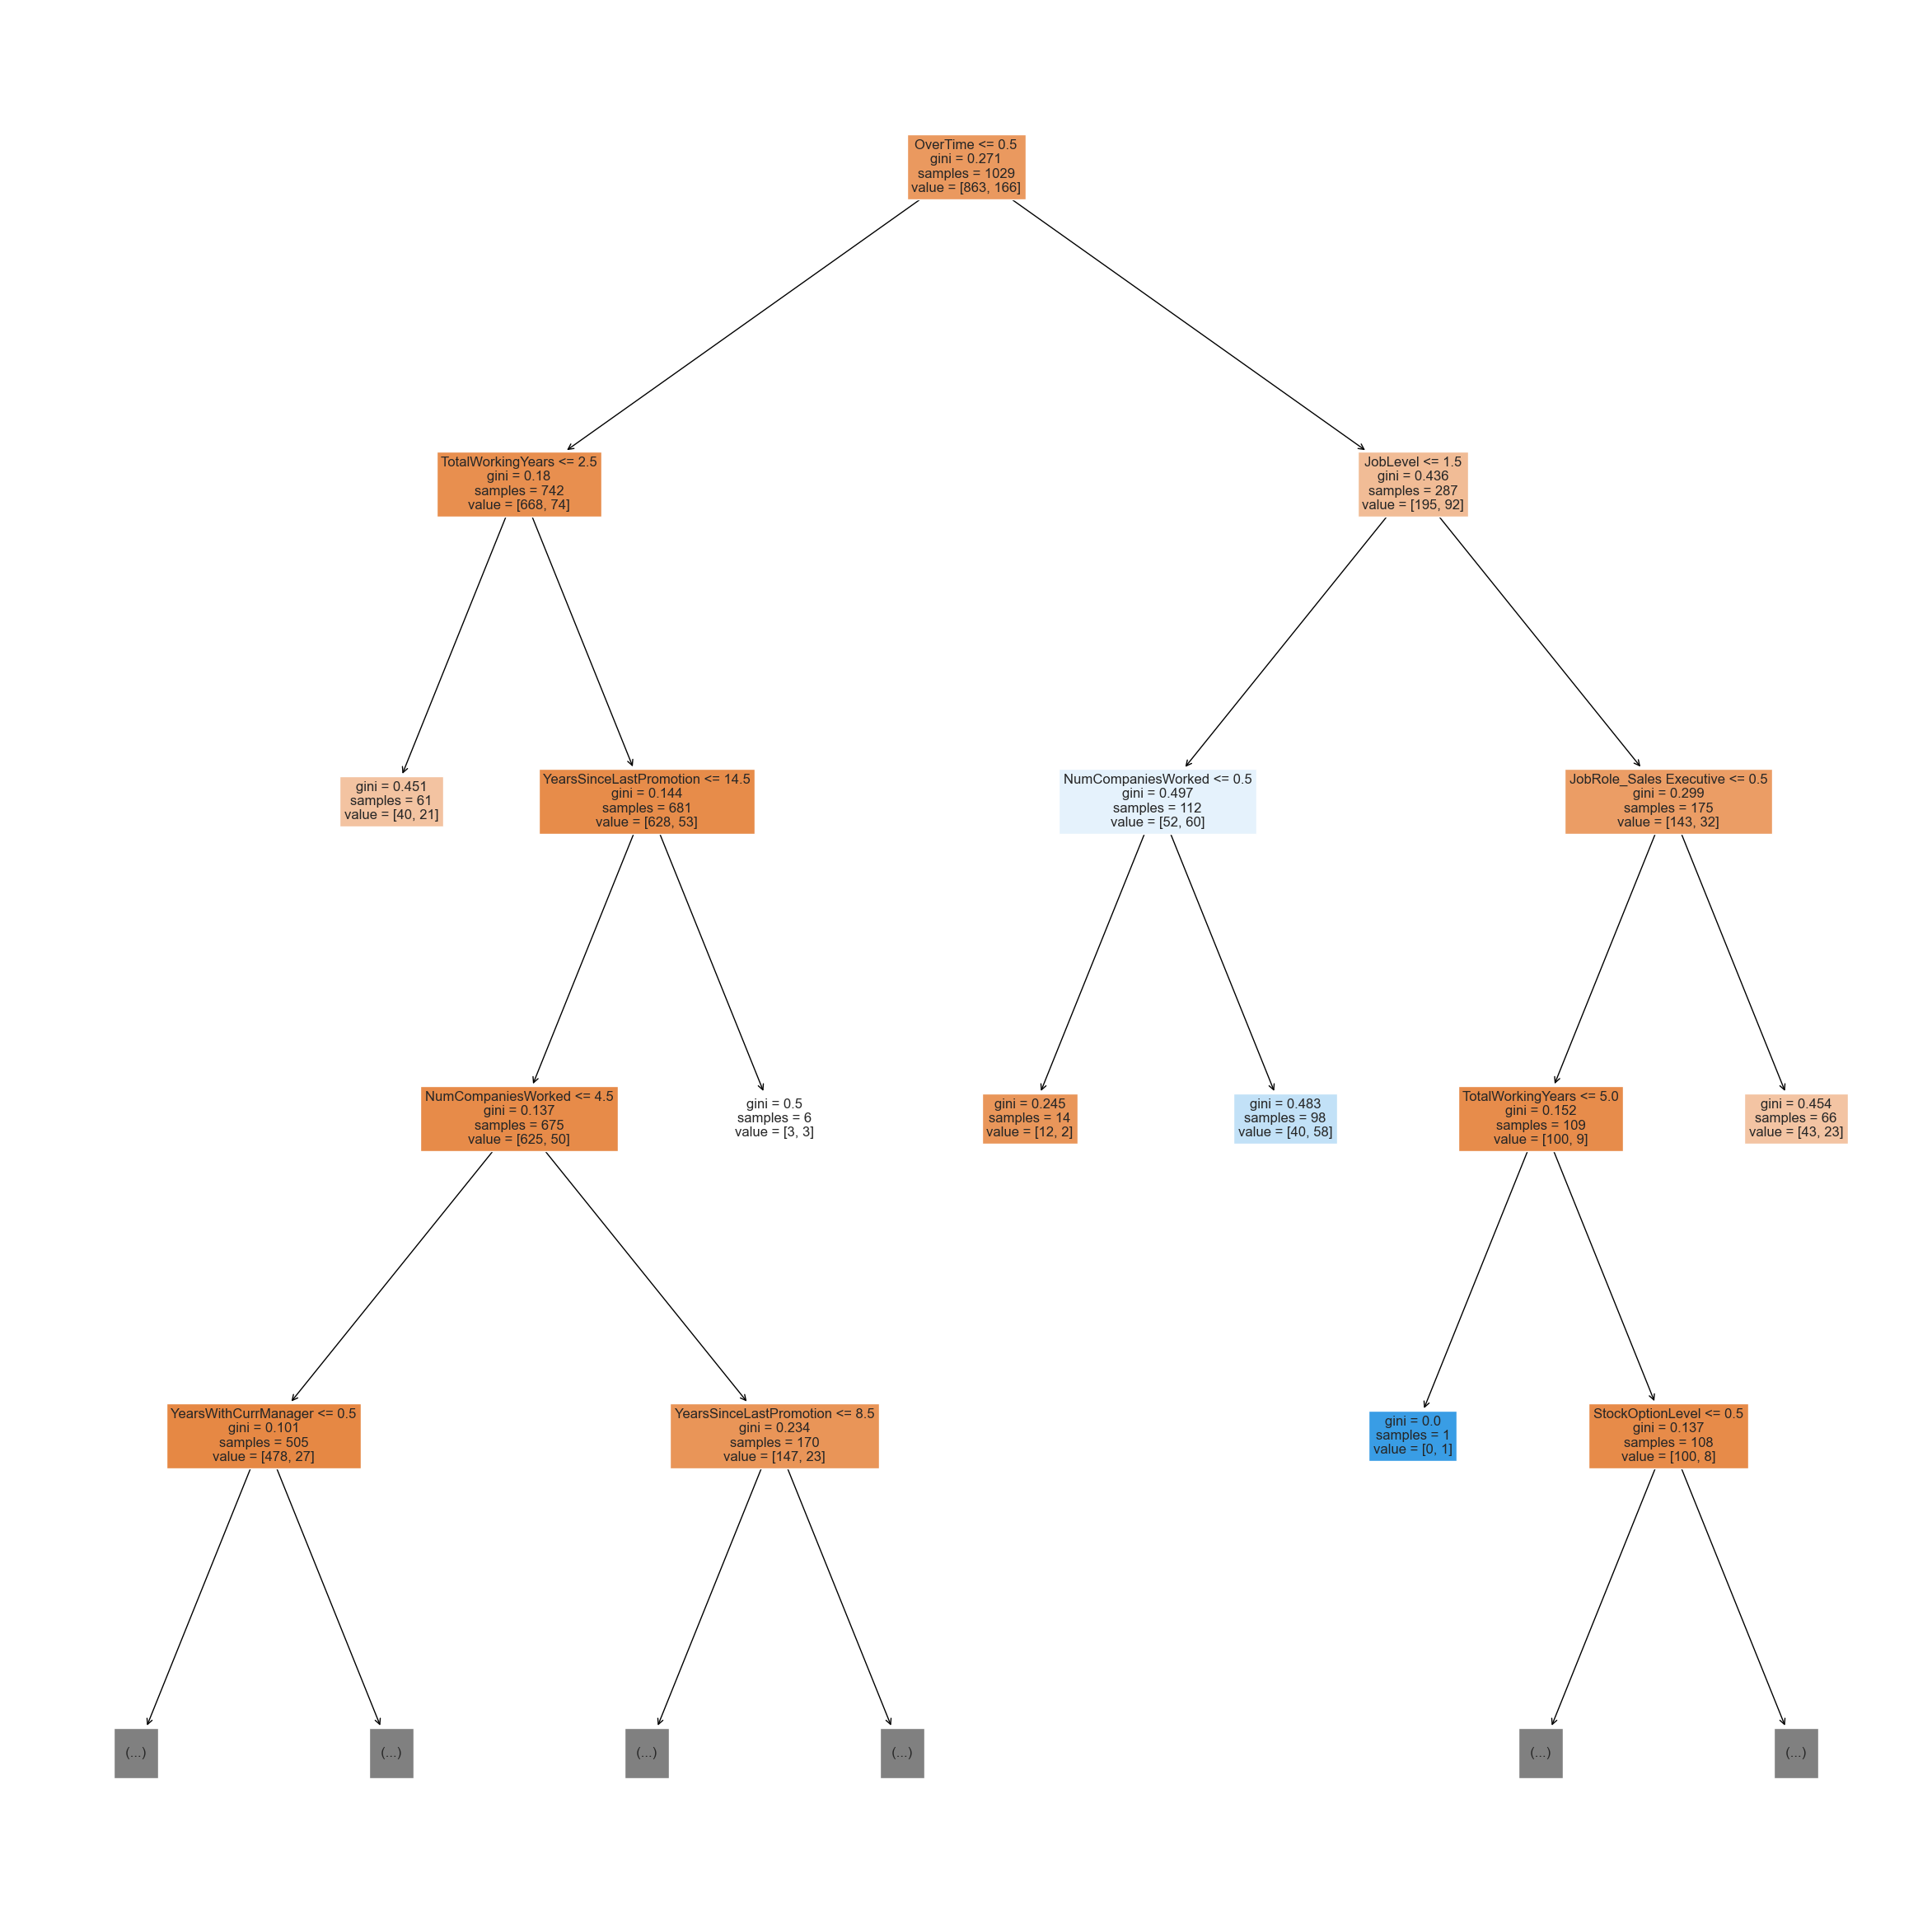

In [1006]:
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 30))
out = tree.plot_tree(
    best_dt,    
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=12,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Feature Importance**

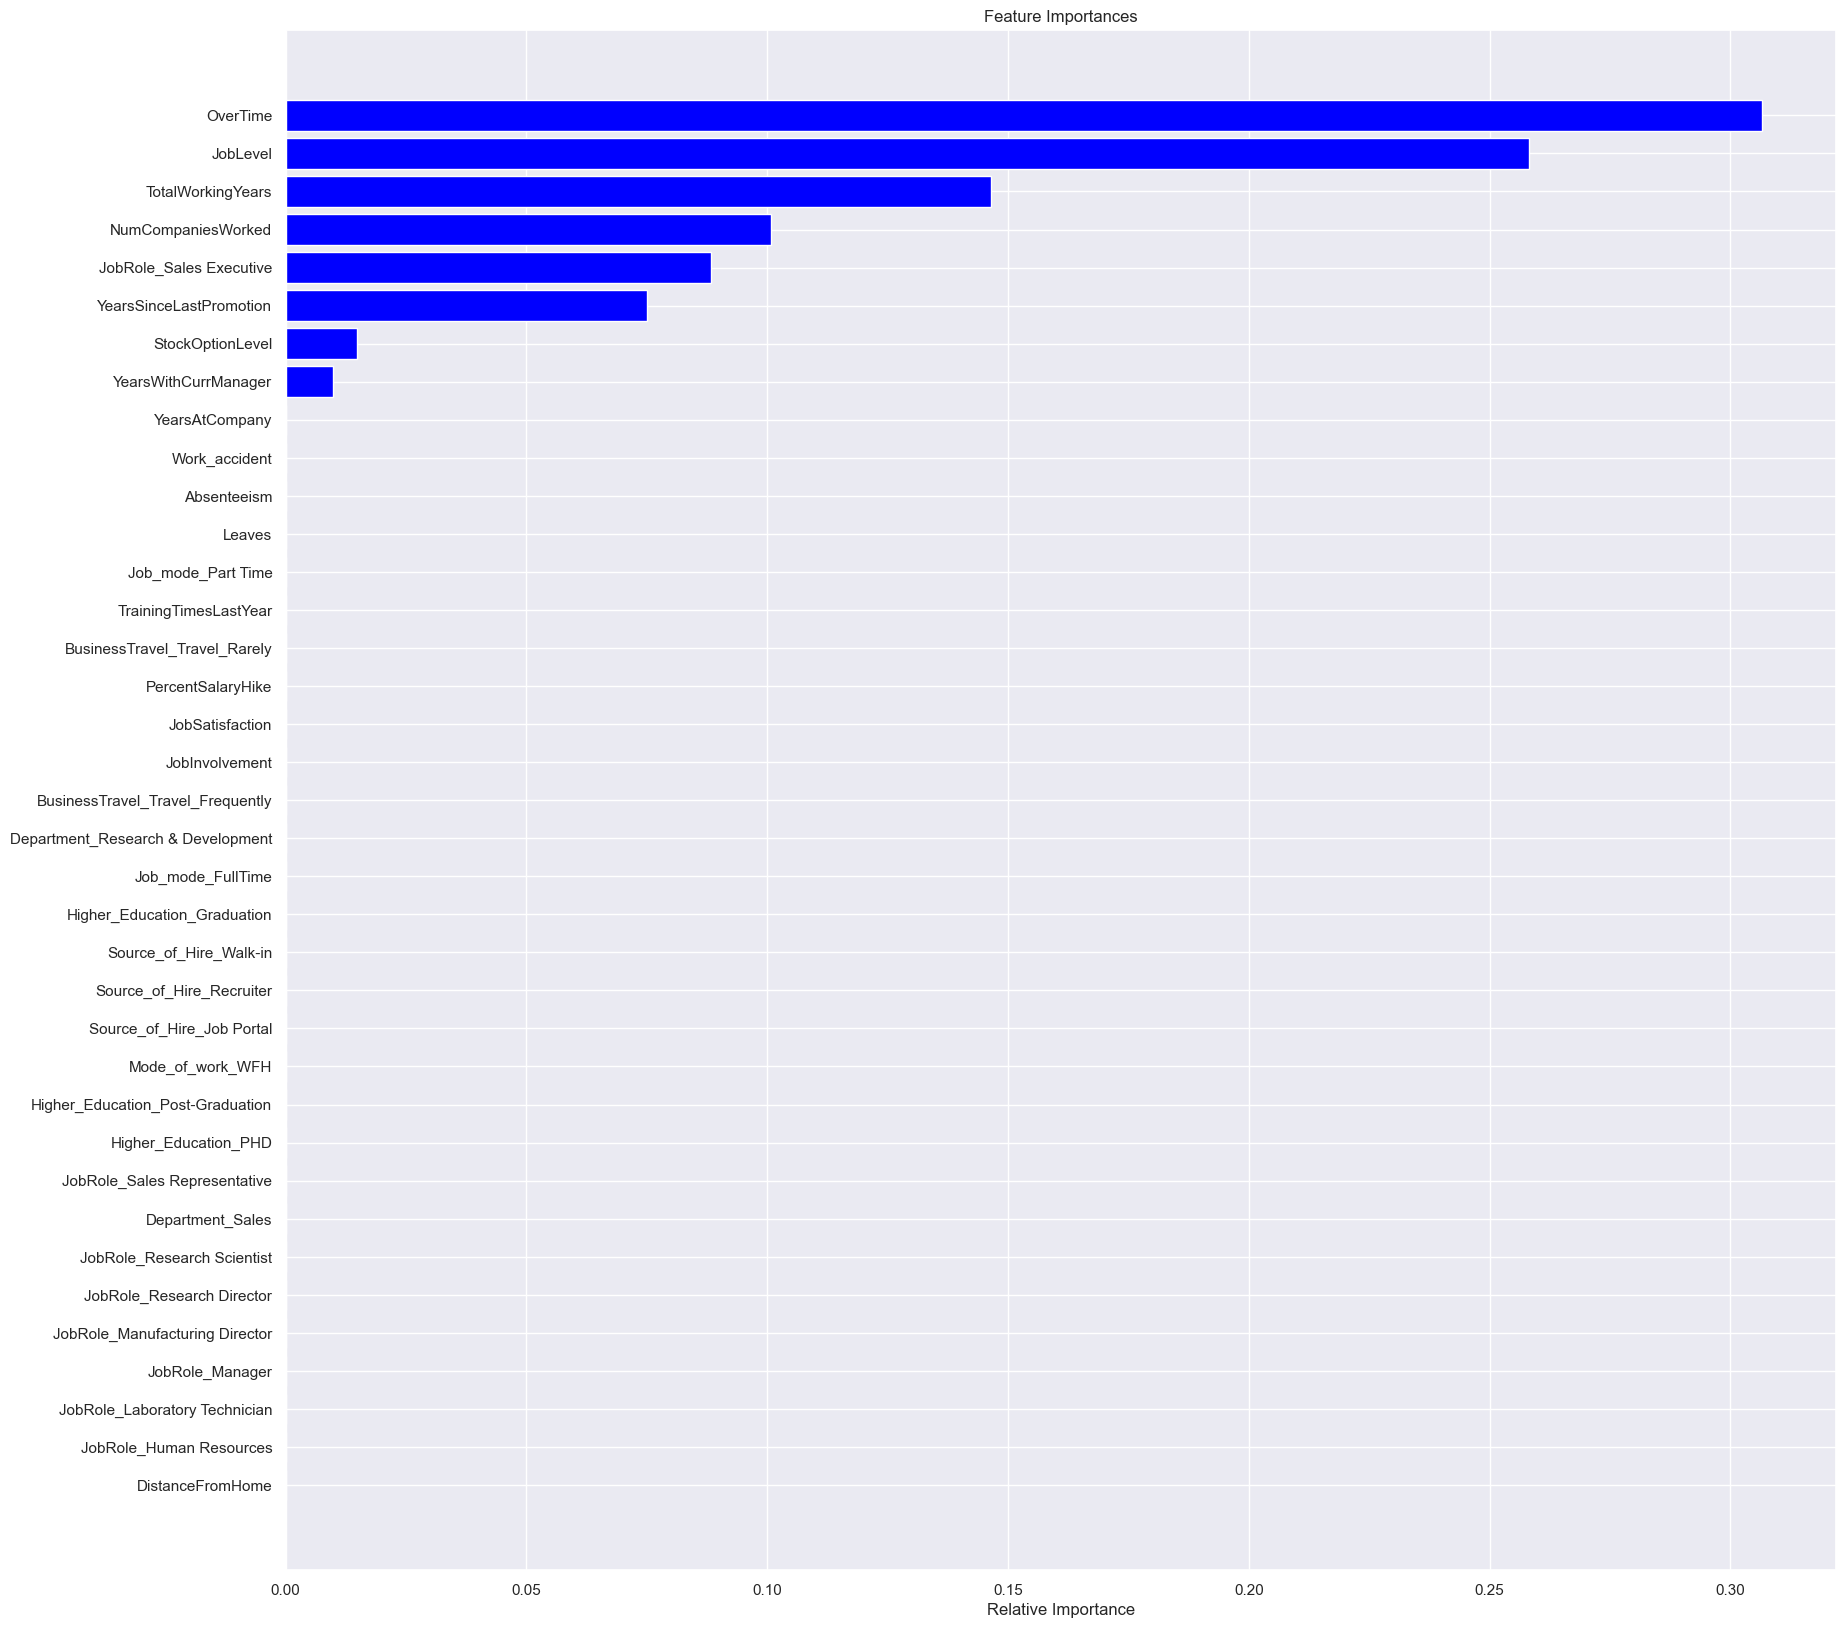

In [1007]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 20))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Decision Tree Final Observations**

The decision tree has weaker performance than both Logistic Regression and SVC.  In general, Decision Trees are weak classifiers (granted Logistic Regression is as well) and that is reflected here.  

**Verdict: Decision Tree is not as effective as the other models so far.  I will most likely not utilize Decision Tree for any future development/deployment**

---------
### **Random Forest**
---------

**Build a Random Forest Model**

In [1008]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_estimator = RandomForestClassifier(
    random_state=1,
    n_estimators=500,        
    max_depth=5,            
    min_samples_split=25,    
    min_samples_leaf=25,     
    max_features='sqrt',    
    bootstrap=True,         
    oob_score=True,         
    min_impurity_decrease=0.01,
    class_weight='balanced',  
    n_jobs=-1               
)


rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_impurity_decrease=0.01, min_samples_leaf=25,
                       min_samples_split=25, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=1)

**Check the performance of the model on the train data**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       863
           1       0.45      0.72      0.55       166

    accuracy                           0.81      1029
   macro avg       0.69      0.78      0.72      1029
weighted avg       0.86      0.81      0.83      1029



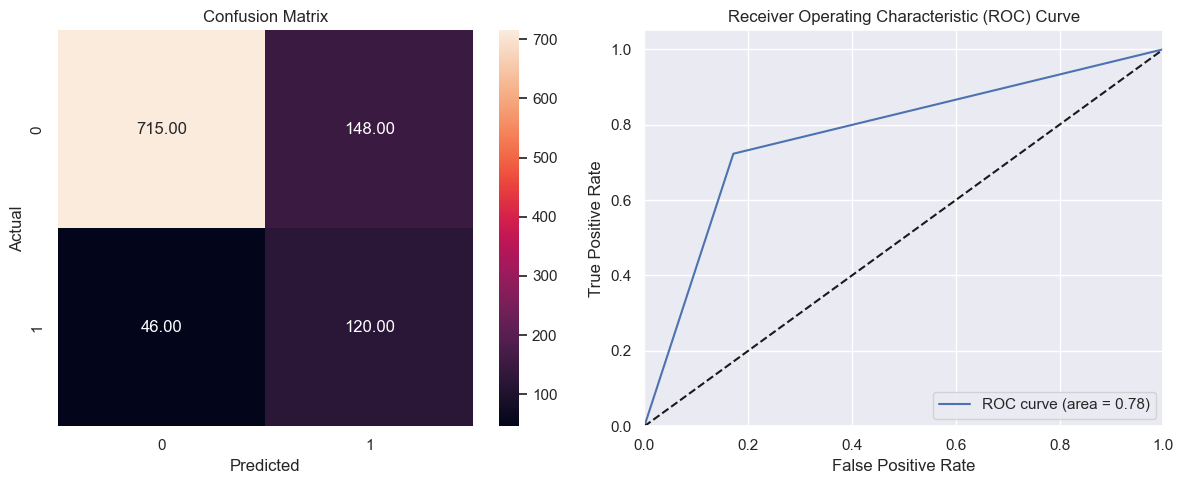

In [1009]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)
    

**Check model performance on test data**

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       370
           1       0.37      0.59      0.46        71

    accuracy                           0.77       441
   macro avg       0.64      0.70      0.66       441
weighted avg       0.82      0.77      0.79       441



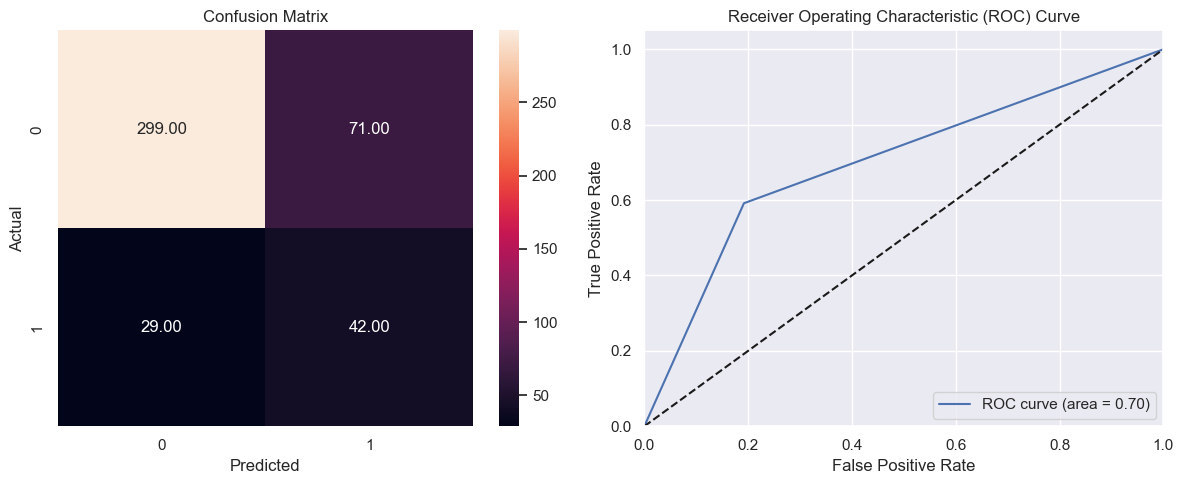

In [1010]:
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observation**

As we would have expected, the RF model has better initial performance compared to Decision Tree and Logistic Regression.

Considering our use case and prioritization of Recall, let's see if we can further refine performance using an Optimal Threshold like we have with other models.

**Find the optimal threshold**

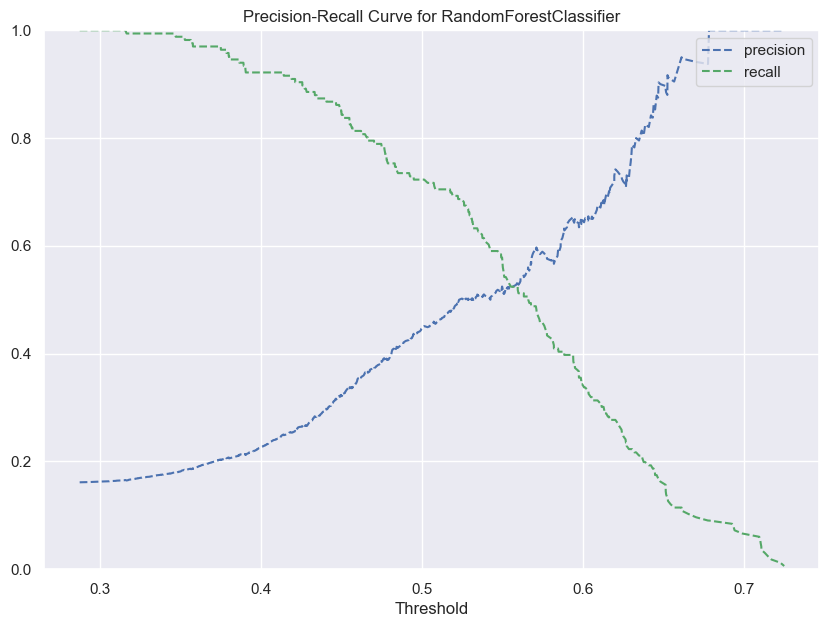

In [1011]:
y_scores_rf = rf_estimator.predict_proba(X_train)

y_scores_rf_pos = y_scores_rf[:, 1]

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf_pos)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_rf, precisions_rf[:-1], 'b--', label='precision')
plt.plot(thresholds_rf, recalls_rf[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.title('Precision-Recall Curve for RandomForestClassifier')
plt.show()

In [1012]:
optimal_threshold_rf = 0.5

**Check performance on train data using optimal threshold**

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       863
           1       0.45      0.72      0.55       166

    accuracy                           0.81      1029
   macro avg       0.69      0.78      0.72      1029
weighted avg       0.86      0.81      0.83      1029



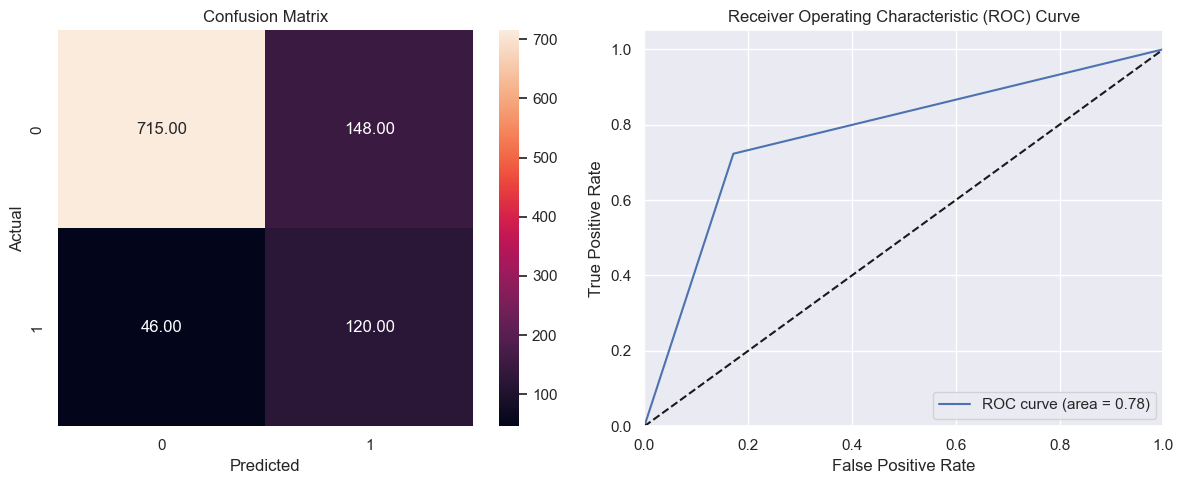

In [1013]:
y_pred_train_rf = rf_estimator.predict_proba(X_train)
y_pred_train_rf_pos = y_pred_train_rf[:, 1]

metrics_score(y_train, y_pred_train_rf_pos > optimal_threshold_rf)


**Check performance on test data using optimal threshold**

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       370
           1       0.37      0.59      0.46        71

    accuracy                           0.77       441
   macro avg       0.64      0.70      0.66       441
weighted avg       0.82      0.77      0.79       441



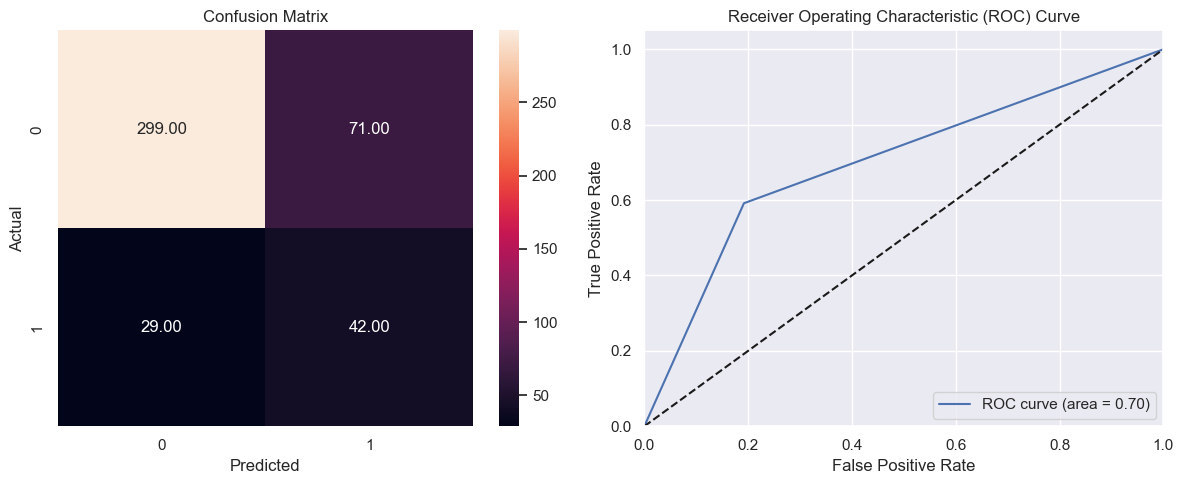

In [1014]:
y_pred_test_rf = rf_estimator.predict_proba(X_test)
y_pred_test_rf_pos = y_pred_test_rf[:, 1]

metrics_score(y_test, y_pred_test_rf_pos > optimal_threshold_rf)

**Perform hyperparameter tuning for the random forest model using GridSearch CV**

We will now do a grid search to tune hyperparameters.  Build the model with tuned hyperparameters.  Then apply optimal selected threshold from previous step.

In [1015]:
estimator = RandomForestClassifier(
    random_state=1,
    class_weight='balanced'  
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [3, 5, 7, 10],       
    "max_leaf_nodes": [25, 50, 75, 100],
    "min_samples_split": [25, 50, 75, 100],
    "max_features": ['sqrt', 'log2']  
}

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Get the best model
best_rf = grid_obj.best_estimator_

# Display the selected parameters
print("Selected Parameters:")
print(grid_obj.best_params_)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Selected Parameters:
{'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': 25, 'min_samples_split': 100, 'n_estimators': 300}


**Check performance of the model on train data using optimal threshold and tuned hyperparameters**

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       863
           1       0.50      0.78      0.61       166

    accuracy                           0.84      1029
   macro avg       0.73      0.81      0.75      1029
weighted avg       0.88      0.84      0.85      1029



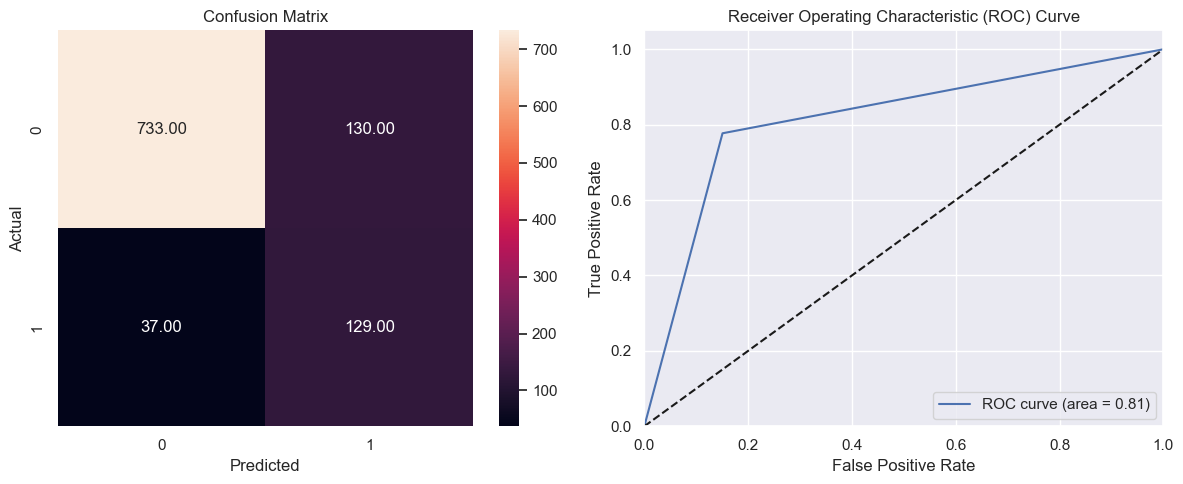

In [1016]:
train_probs_rf = best_rf.predict_proba(X_train)
train_preds_rf = (train_probs_rf[:, 1] > optimal_threshold_rf).astype(int)

metrics_score(y_train, train_preds_rf)

**Check performance of the model on test data using optimal threshold and tuned hyperparameters**

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       370
           1       0.44      0.66      0.53        71

    accuracy                           0.81       441
   macro avg       0.68      0.75      0.70       441
weighted avg       0.85      0.81      0.82       441



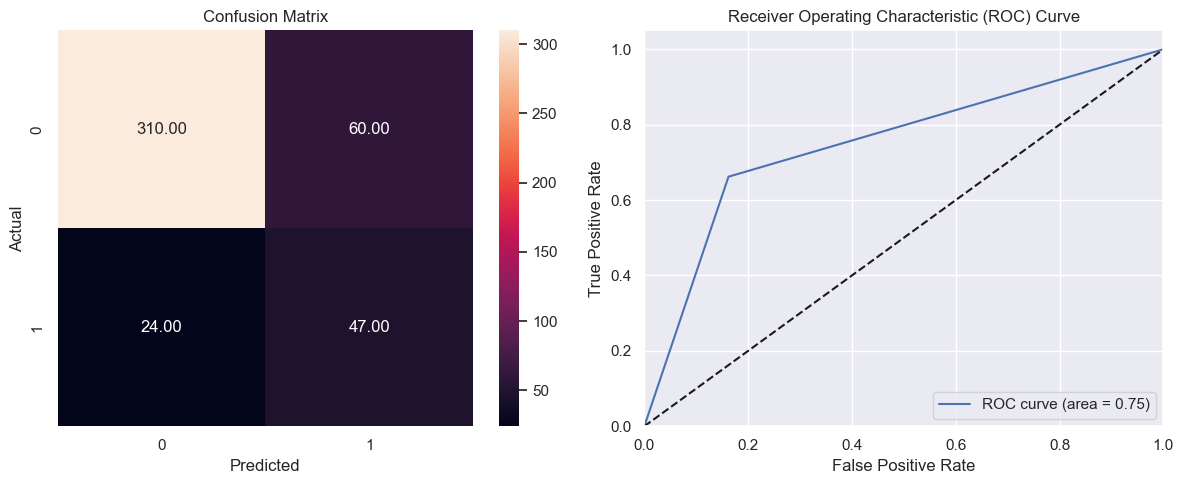

In [1017]:
test_probs_rf = best_rf.predict_proba(X_test)
test_preds_rf = (test_probs_rf[:, 1] > optimal_threshold_rf).astype(int)

metrics_score(y_test, test_preds_rf)

**Feature Importance**

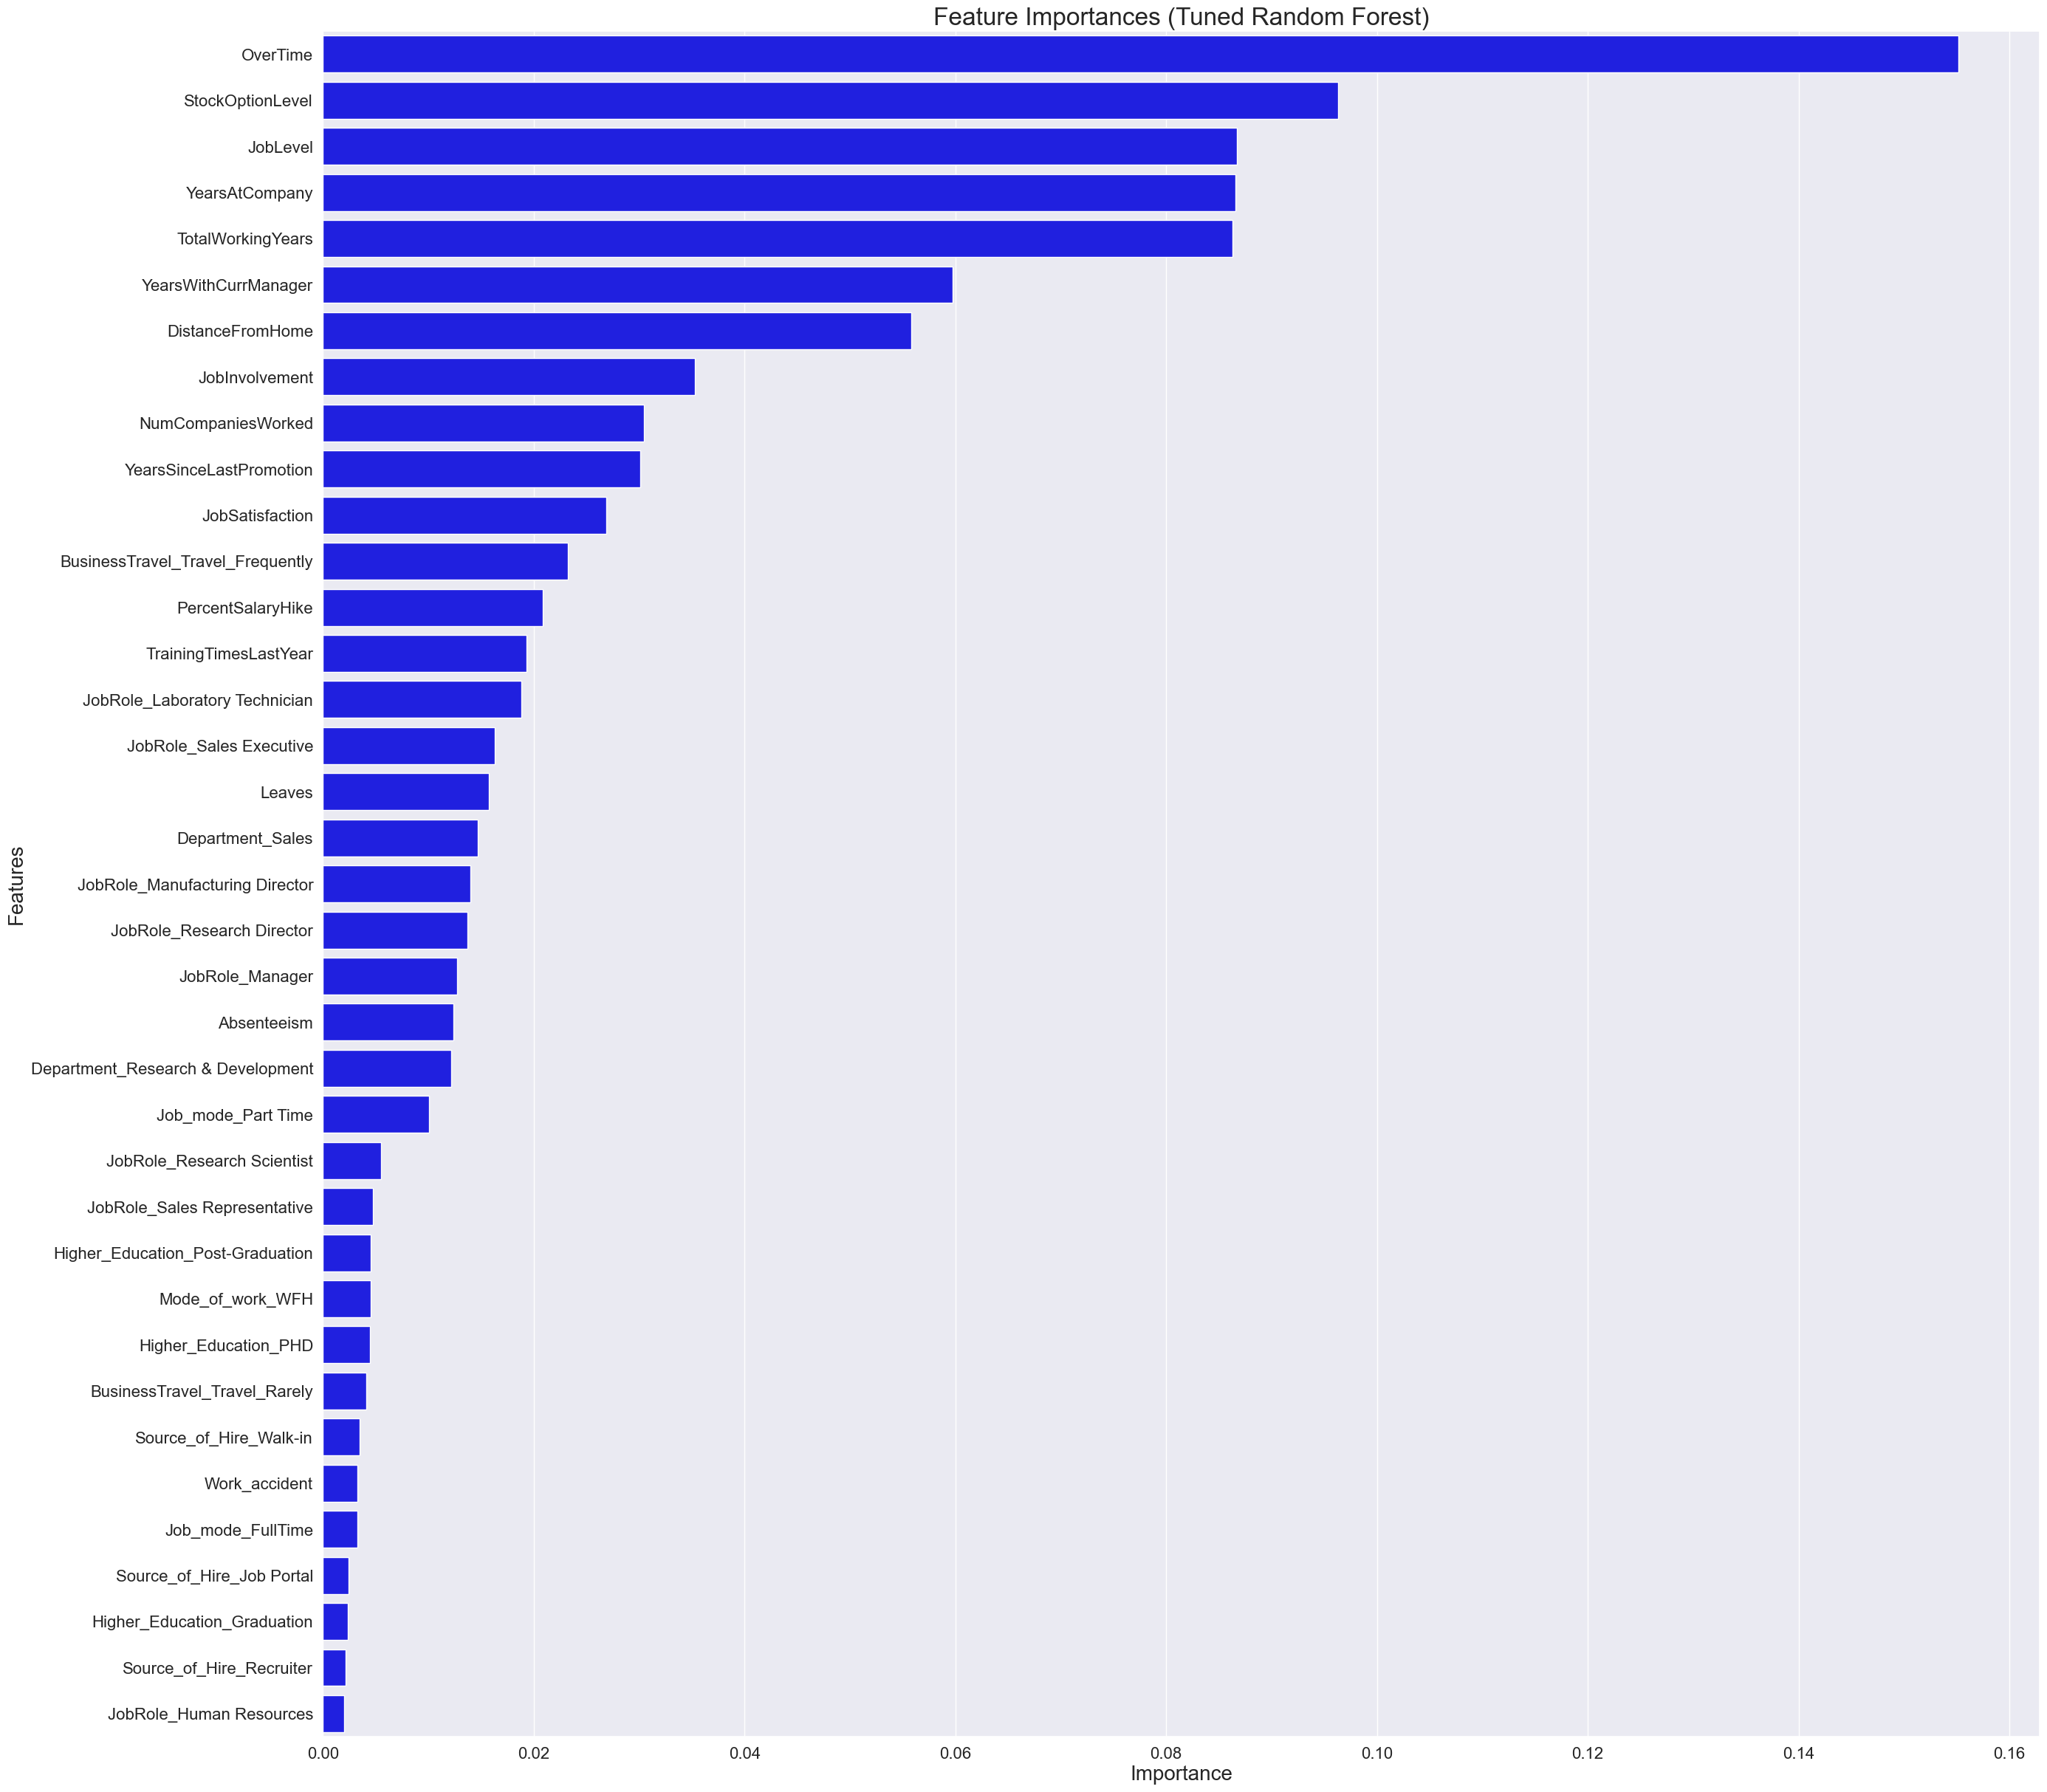

In [1018]:
importances = best_rf.feature_importances_
columns = X_train.columns

# Create DataFrame for feature importances
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(30, 30))
plt.title("Feature Importances (Tuned Random Forest)", fontsize=24)  
plt.xlabel("Importance", fontsize=20)  
plt.ylabel("Features", fontsize=20) 

sns.barplot(x=importance_df['Importance'], y=importance_df.index, color="blue")

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()



**Random Forest Final Observations**

So far, the Random Forest Classifier is our best performing model, especially after applying chosen threshold and tuned hyperparameters.

**Verdict: At this point, RF is in the lead and I would use this for deployment instead of the LR, SVC, or DT models**

---------
### **AdaBoost**
---------

**Building the AdaBoost model**

In [1019]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoostClassifier with hyperparameters
ada_estimator = AdaBoostClassifier(
    random_state=1,
    n_estimators=200,       
    learning_rate=1,      
    algorithm='SAMME.R'     
)

ada_estimator.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

**Check Model Performance on Train Data**

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       863
           1       0.79      0.52      0.63       166

    accuracy                           0.90      1029
   macro avg       0.85      0.75      0.79      1029
weighted avg       0.89      0.90      0.89      1029



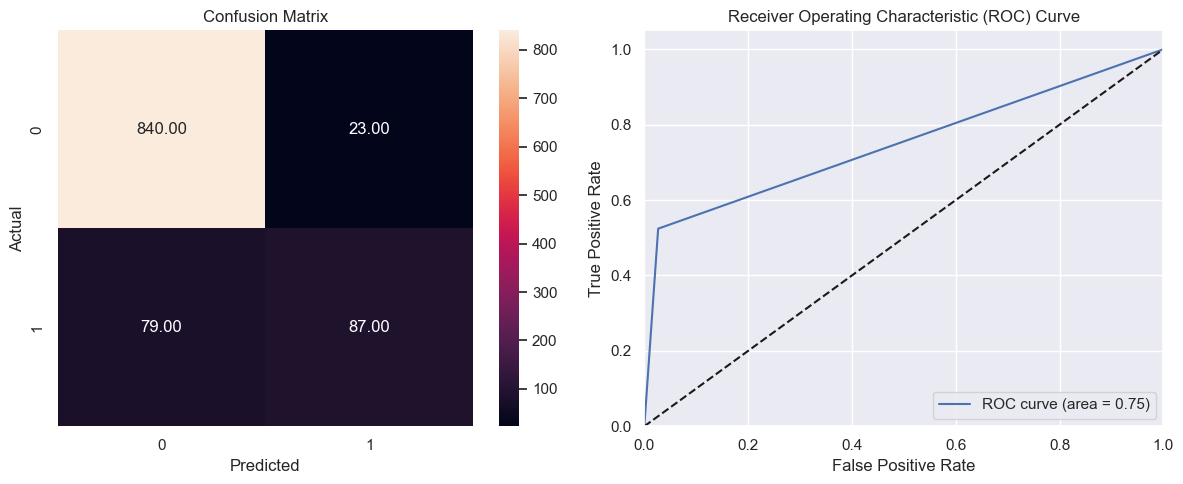

In [1020]:
y_pred_train_ada = ada_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_ada)

**Check Model Performance on Test Data**

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.51      0.30      0.38        71

    accuracy                           0.84       441
   macro avg       0.69      0.62      0.64       441
weighted avg       0.82      0.84      0.82       441



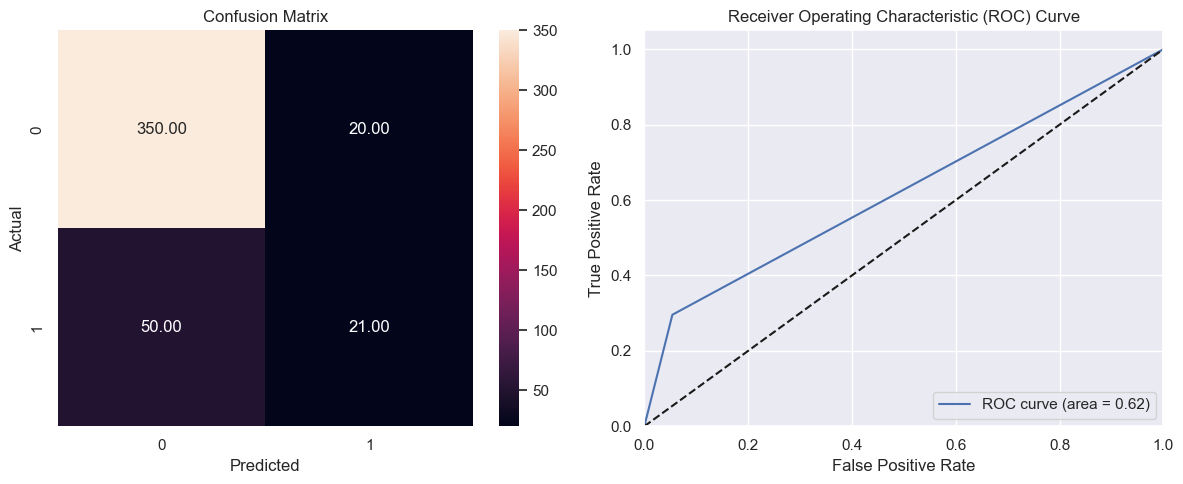

In [1021]:
y_pred_test_ada = ada_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_ada)

**Observation**

Adaboost did not perform well overall and is predicting nearly all records as 0.  

Considering our use case and prioritization of Recall, let's see if we can further refine performance using an Optimal Threshold like we have with other models.

**Find the optimal threshold**

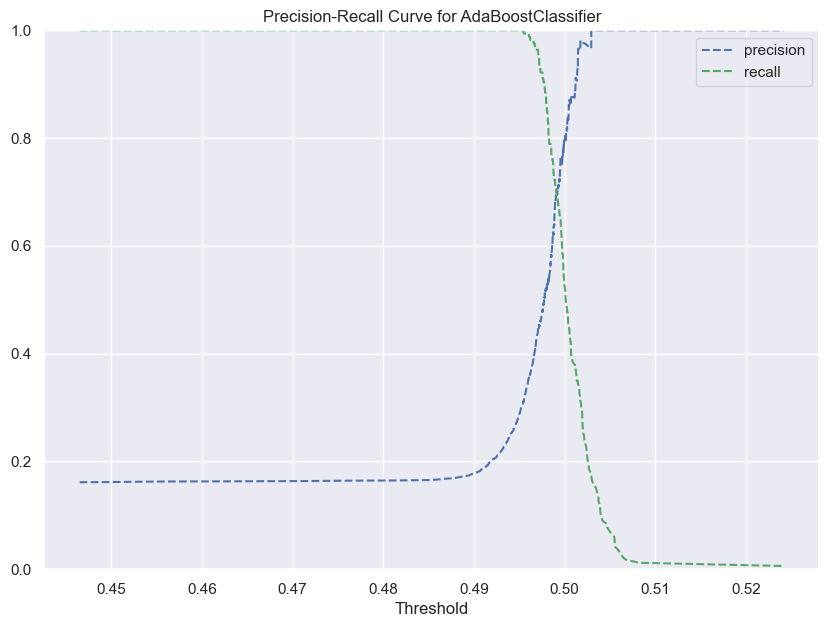

In [1022]:
y_scores_ada = ada_estimator.predict_proba(X_train)
y_scores_ada_pos = y_scores_ada[:, 1]

precisions_ada, recalls_ada, thresholds_ada = precision_recall_curve(y_train, y_scores_ada_pos)

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10, 7))
plt.plot(thresholds_ada, precisions_ada[:-1], 'b--', label='precision')
plt.plot(thresholds_ada, recalls_ada[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.title('Precision-Recall Curve for AdaBoostClassifier')
plt.show()

In [1023]:
optimal_threshold_ada= 0.5

**Check performance on train data using optimal threshold**

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       863
           1       0.79      0.52      0.63       166

    accuracy                           0.90      1029
   macro avg       0.85      0.75      0.79      1029
weighted avg       0.89      0.90      0.89      1029



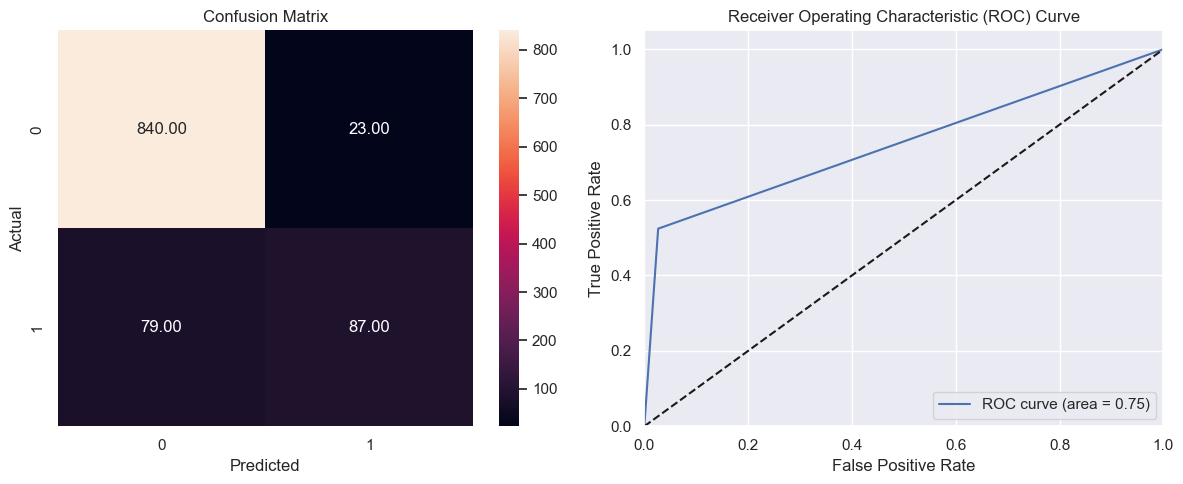

In [1024]:
y_pred_train_ada = ada_estimator.predict_proba(X_train)
y_pred_train_ada_pos = y_pred_train_ada[:, 1]
metrics_score(y_train, y_pred_train_ada_pos > optimal_threshold_ada)


**Check performance on test data using optimal threshold**

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.51      0.30      0.38        71

    accuracy                           0.84       441
   macro avg       0.69      0.62      0.64       441
weighted avg       0.82      0.84      0.82       441



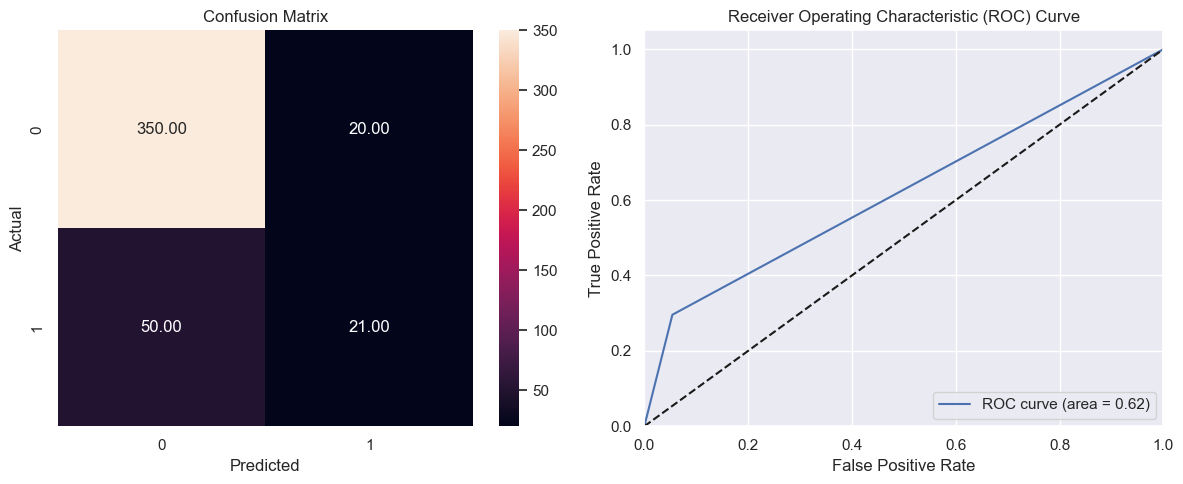

In [1025]:
y_pred_test_ada = ada_estimator.predict_proba(X_test)
y_pred_test_ada_pos = y_pred_test_ada[:, 1]
metrics_score(y_test, y_pred_test_ada_pos > optimal_threshold_ada)

**Observations:** 

This is a highly sensitive model.  Just a slight change in threshold or parameters causes nearly all records to be predicted on one side or the other.  Overall performance is worse than Random Forest, and comparable to LR and DT.

**Verdict: I have a higher comfort level with the Random Forest and will not continue with AdaBoost.**


---------
### **XGBoost**
---------

**Building the XGBoost Model**

In [1026]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier with hyperparameters
xgb_estimator = XGBClassifier(
    random_state=1,
    n_estimators=200,       # Number of boosting rounds
    max_depth=5,            # Maximum depth of trees
    learning_rate=0.1,      # Learning rate
    min_child_weight=25,    # Minimum sum of instance weight in a child
    subsample=0.8,          # Subsample ratio of training instances
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    objective='binary:logistic'  # For binary classification
)

xgb_estimator.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=25, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

**Check model performance on train data**

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       863
           1       0.88      0.37      0.52       166

    accuracy                           0.89      1029
   macro avg       0.89      0.68      0.73      1029
weighted avg       0.89      0.89      0.87      1029



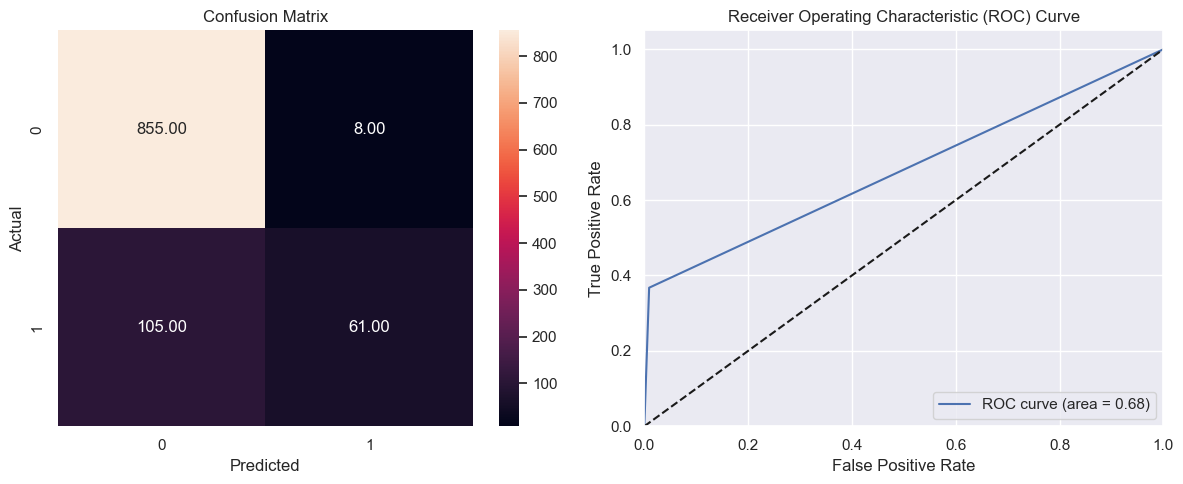

In [1027]:
y_pred_train_xgb = xgb_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_xgb)

**Check performance on test data**

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       370
           1       0.64      0.30      0.40        71

    accuracy                           0.86       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.84      0.86      0.84       441



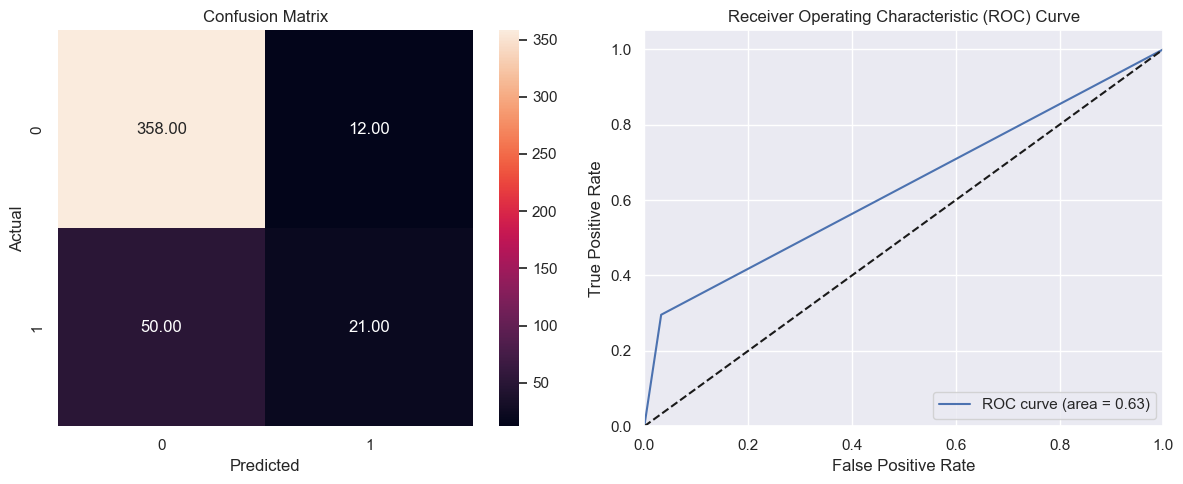

In [1028]:
y_pred_test_xgb = xgb_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_xgb)

**Observation**

Initial performance on xgboost is about on par with LR and SVC.

Considering our use case and prioritization of Recall, let's see if we can further refine performance using an Optimal Threshold like we have with other models.

**Finding optimal threshold**

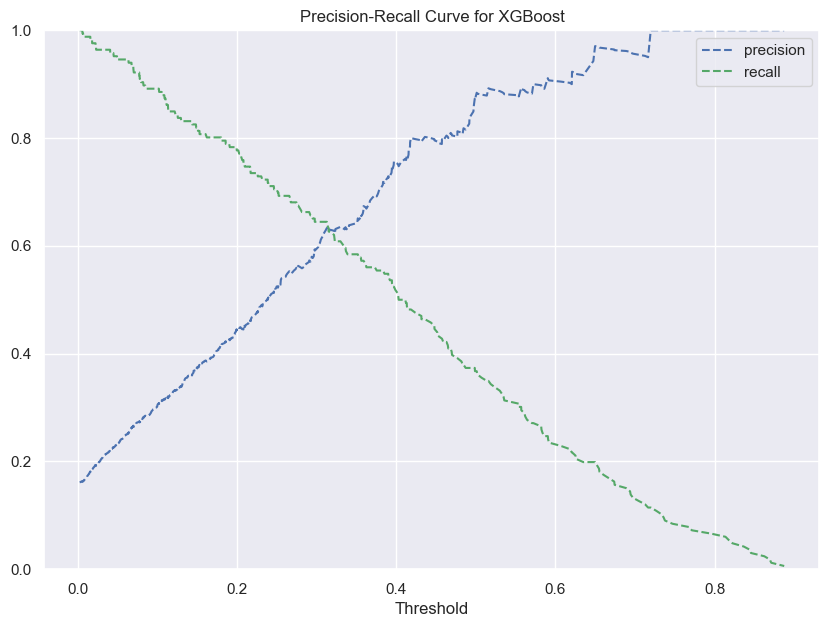

In [1029]:
y_scores_xgb = xgb_estimator.predict_proba(X_train)
y_scores_xgb_pos = y_scores_xgb[:, 1]

precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train, y_scores_xgb_pos)

plt.figure(figsize=(10, 7))
plt.plot(thresholds_xgb, precisions_xgb[:-1], 'b--', label='precision')
plt.plot(thresholds_xgb, recalls_xgb[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.title('Precision-Recall Curve for XGBoost')
plt.show()

In [1030]:
optimal_threshold_xgb= 0.2

**Check performance on train data using optimal threshold**

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       863
           1       0.45      0.78      0.57       166

    accuracy                           0.81      1029
   macro avg       0.70      0.80      0.72      1029
weighted avg       0.87      0.81      0.83      1029



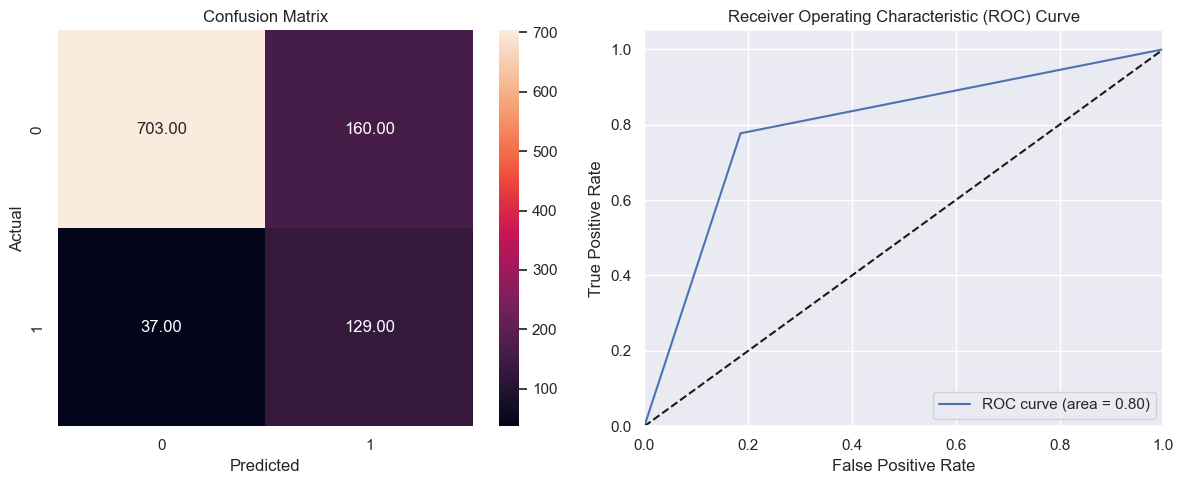

In [1031]:
y_pred_train_xgb = xgb_estimator.predict_proba(X_train)
y_pred_train_xgb_pos = y_pred_train_xgb[:, 1]
metrics_score(y_train, y_pred_train_xgb_pos > optimal_threshold_xgb)

**Check performance on train data using optimal threshold**

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       370
           1       0.44      0.72      0.54        71

    accuracy                           0.80       441
   macro avg       0.69      0.77      0.71       441
weighted avg       0.86      0.80      0.82       441



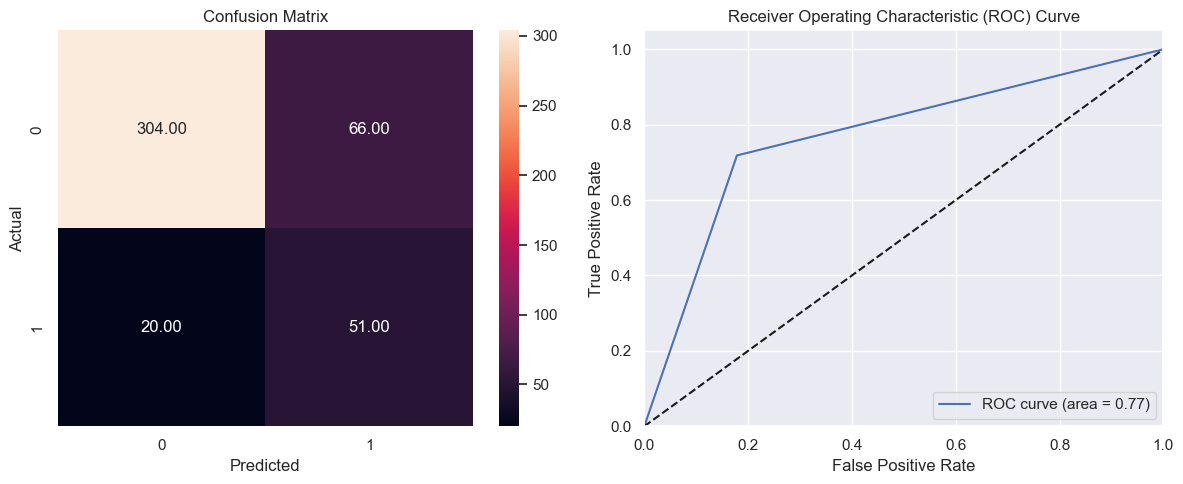

In [1032]:
y_pred_test_xgb = xgb_estimator.predict_proba(X_test)
y_pred_test_xgb_pos = y_pred_test_xgb[:, 1]
metrics_score(y_test, y_pred_test_xgb_pos > optimal_threshold_xgb)

Adjusting the threshold has improved performance especially when considering our goal of managing Recall.

**Feature Importance**

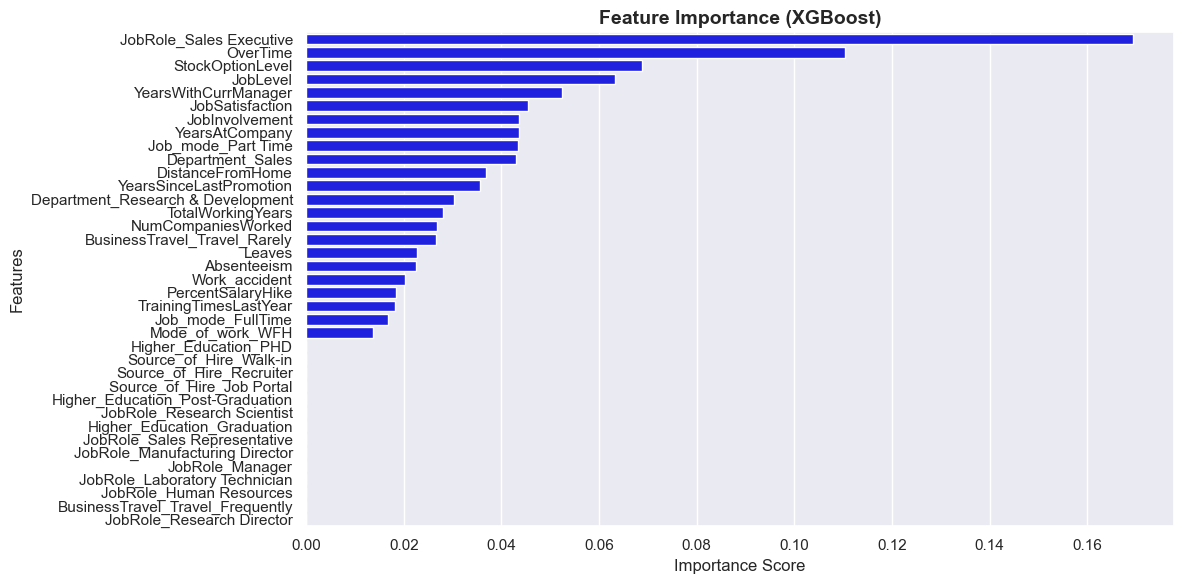

In [1033]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_estimator.feature_importances_
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', color='blue')
plt.title('Feature Importance (XGBoost)', fontsize=14, weight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

**XGBoost Final Observations**

XGBoost has strong performance, especially after selecting the threshold that best manages Recall.

**Verdict: XGBoost should be includes as part of our final deployment decision**

---------
### **Summary of Model Performance on Test Data**
---------


MODEL: Logistic Regression
Threshold: 0.15

Test Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       370
           1       0.34      0.65      0.44        71

    accuracy                           0.74       441
   macro avg       0.63      0.70      0.64       441
weighted avg       0.82      0.74      0.77       441

AUC Score: 0.7744


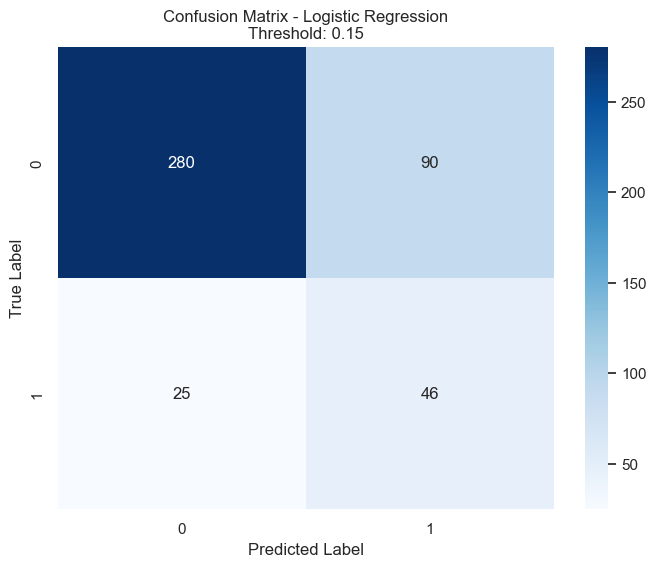

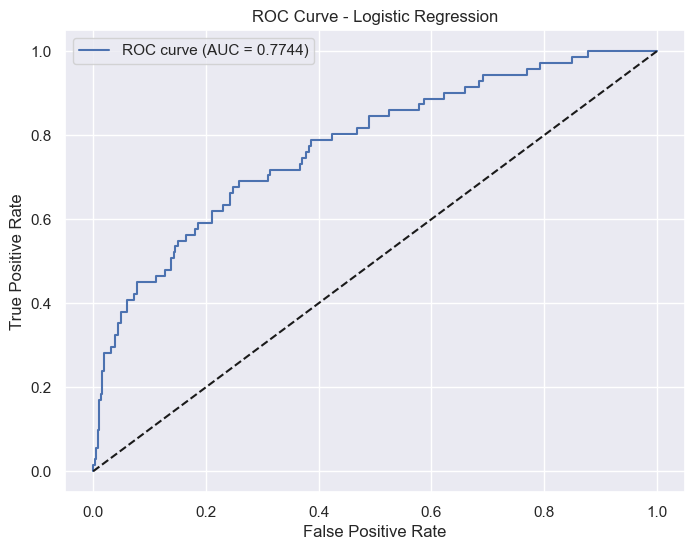


MODEL: Support Vector Machine
Threshold: 0.15

Test Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       370
           1       0.33      0.66      0.44        71

    accuracy                           0.73       441
   macro avg       0.62      0.70      0.63       441
weighted avg       0.82      0.73      0.76       441

AUC Score: 0.7710


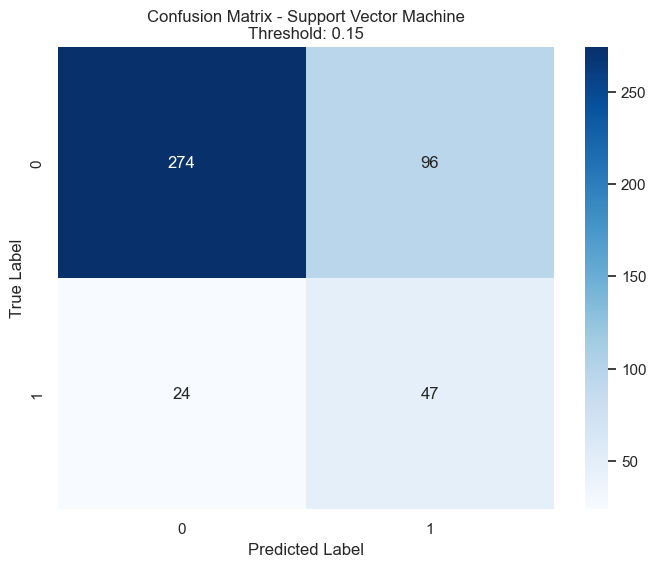

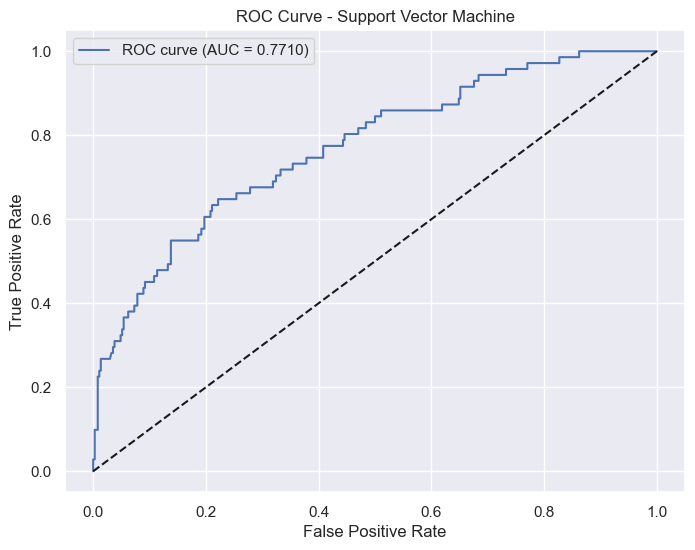


MODEL: Decision Tree
Threshold: 0.15

Test Set Performance:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       370
           1       0.30      0.61      0.40        71

    accuracy                           0.71       441
   macro avg       0.60      0.66      0.60       441
weighted avg       0.81      0.71      0.74       441

AUC Score: 0.7280


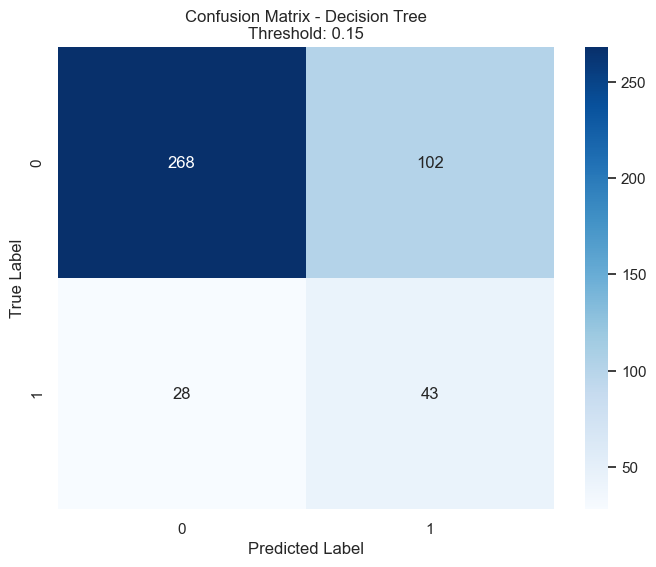

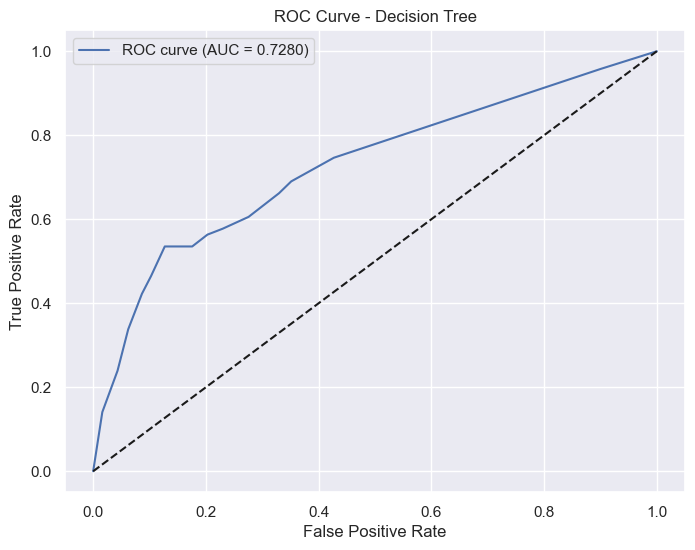


MODEL: Random Forest
Threshold: 0.5

Test Set Performance:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       370
           1       0.44      0.66      0.53        71

    accuracy                           0.81       441
   macro avg       0.68      0.75      0.70       441
weighted avg       0.85      0.81      0.82       441

AUC Score: 0.7835


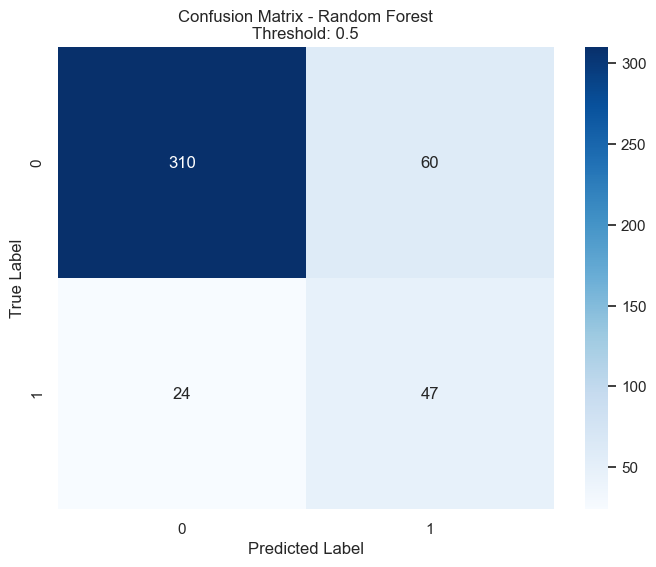

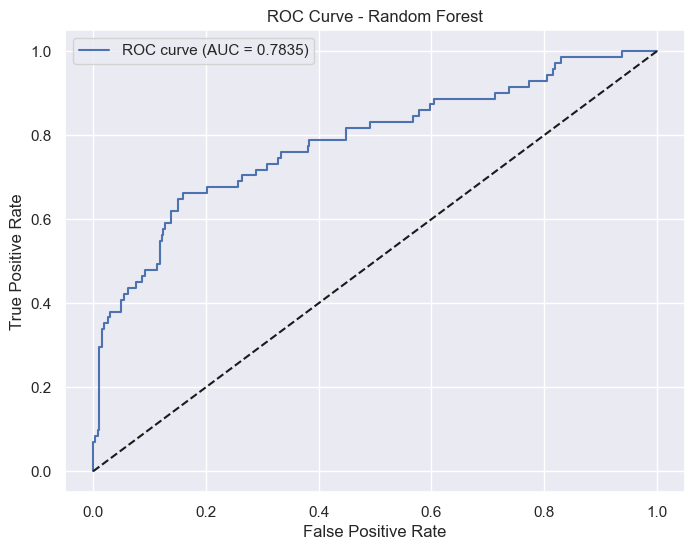


MODEL: AdaBoost
Threshold: 0.5

Test Set Performance:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       370
           1       0.51      0.30      0.38        71

    accuracy                           0.84       441
   macro avg       0.69      0.62      0.64       441
weighted avg       0.82      0.84      0.82       441

AUC Score: 0.7898


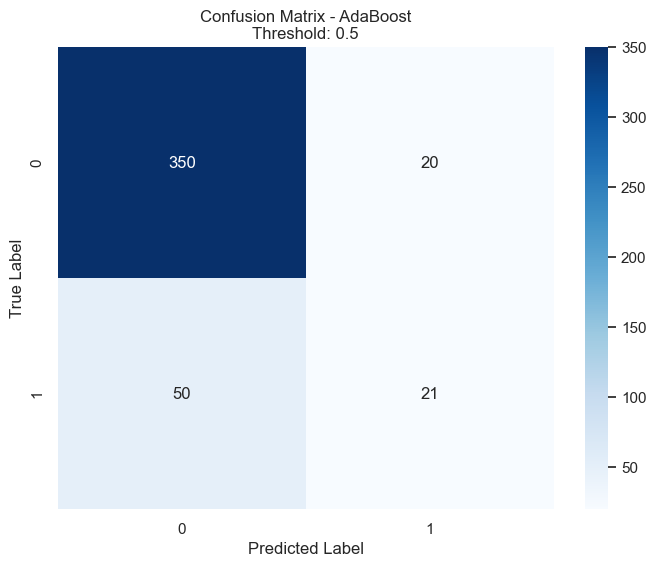

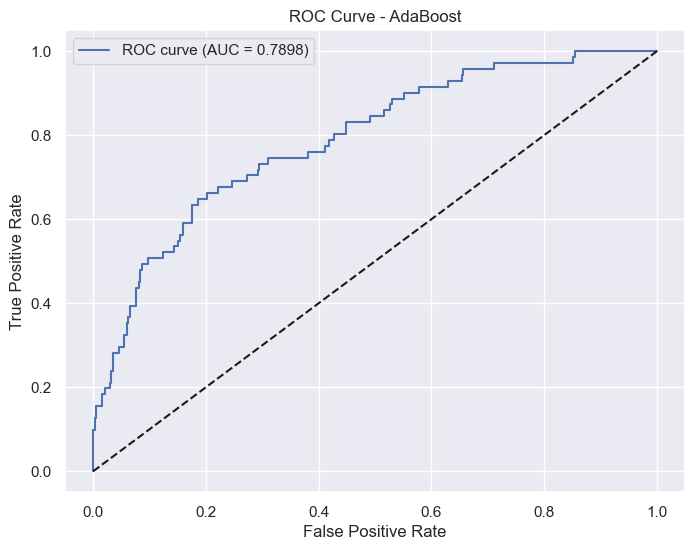


MODEL: XGBoost
Threshold: 0.2

Test Set Performance:
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       370
           1       0.44      0.72      0.54        71

    accuracy                           0.80       441
   macro avg       0.69      0.77      0.71       441
weighted avg       0.86      0.80      0.82       441

AUC Score: 0.8033


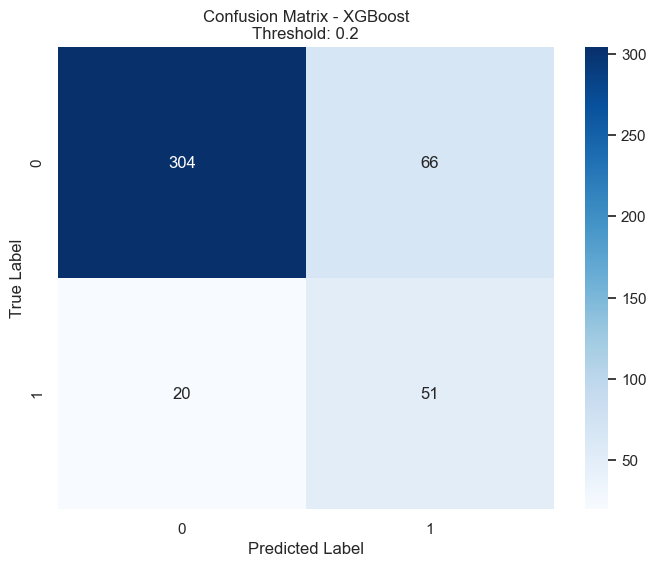

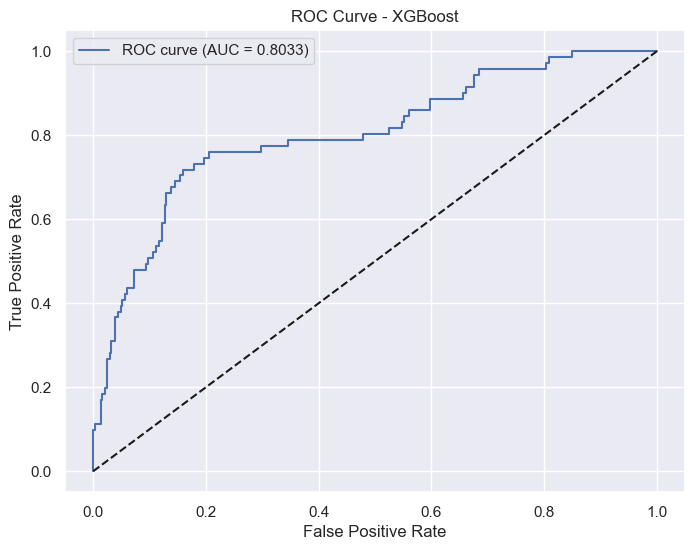

<Figure size 1500x800 with 0 Axes>

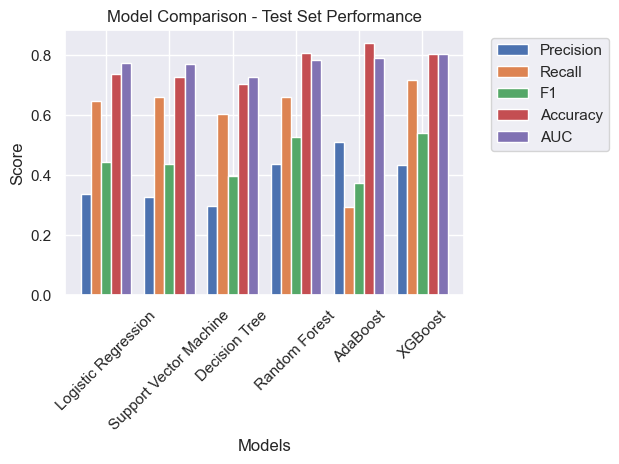


Summary of All Models:
                        Threshold  Precision    Recall        F1  Accuracy  \
Model                                                                        
Logistic Regression          0.15   0.338235  0.647887  0.444444  0.739229   
Support Vector Machine       0.15   0.328671  0.661972  0.439252  0.727891   
Decision Tree                0.15   0.296552  0.605634  0.398148  0.705215   
Random Forest                0.50   0.439252  0.661972  0.528090  0.809524   
AdaBoost                     0.50   0.512195  0.295775  0.375000  0.841270   
XGBoost                      0.20   0.435897  0.718310  0.542553  0.804989   

                             AUC  
Model                             
Logistic Regression     0.774419  
Support Vector Machine  0.770974  
Decision Tree           0.727979  
Random Forest           0.783517  
AdaBoost                0.789760  
XGBoost                 0.803350  


In [1035]:
# models
models = {
    'Logistic Regression': lg,
    'Support Vector Machine': model, 
    'Decision Tree': model_dt,
    'Random Forest': best_rf,
    'AdaBoost': ada_estimator,
    'XGBoost': xgb_estimator
}

# thresholds I chose
thresholds = {
    'Logistic Regression': 0.15,    
    'Support Vector Machine': 0.15,  
    'Decision Tree': 0.15,          
    'Random Forest': 0.5,          
    'AdaBoost': 0.5,              
    'XGBoost': 0.2                 
}

def print_model_summary(models, thresholds, X_test, y_test, X_train=None, y_train=None):
    """Print comprehensive summary for multiple models"""
    results = []
    
    for model_name, model in models.items():
        print(f"\n{'='*50}")
        print(f"MODEL: {model_name}")
        print(f"Threshold: {thresholds[model_name]}")
        print('='*50)
        
        # Test Set Performance
        print("\nTest Set Performance:")
        if model_name == 'Support Vector Machine':
            y_pred_proba = model.predict_proba(X_test_scaled)  # Use scaled data for SVM
        else:
            y_pred_proba = model.predict_proba(X_test)
        y_pred = (y_pred_proba[:, 1] > thresholds[model_name]).astype(int)
        
        # Calculate metrics
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # Added AUC
        
        print(classification_report(y_test, y_pred))
        print(f"AUC Score: {auc:.4f}")
        
       
        results.append({
            'Model': model_name,
            'Threshold': thresholds[model_name],
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'Accuracy': acc,
            'AUC': auc
        })
        
        # Confusion matrix
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {model_name}\nThreshold: {thresholds[model_name]}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.4f})')
        plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend()
        plt.show()
    
    # summary
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index('Model')
    
    # Plot comparison
    plt.figure(figsize=(15, 8))
    metrics = ['Precision', 'Recall', 'F1', 'Accuracy', 'AUC']
    results_df[metrics].plot(kind='bar', width=0.8)
    plt.title('Model Comparison - Test Set Performance')
    plt.xlabel('Models')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()
    
    return results_df

# Run 
results_summary = print_model_summary(models, thresholds, X_test, y_test, X_train, y_train)

print("\nSummary of All Models:")
print(results_summary)
 

---------
### **Conclusions**
---------

I built 6 supervised learning models, analyzed results, revised thresholds based on my objective of considering recall, and tuned parameters where appropriate.

Using the summary statistics above, while focusing on a combination of good recall, good F1, good accuracy, and good AUC:

Both Random Forest and XGBoost show promising results in meeting my objective to identify employees with higher risk of attrition.

As next steps for a further implementation (not covered in this project), I would continue exploring both Random Forest and XGBoost, and look to build an ensemble model that using voting method between those two models to ultimately arrive at a predicted probability.